In [2]:
#se cargan las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
import time

# **Ejercicio 1.1**

In [ ]:
#se cargan los datos y se crea el dataframe
data = {
    "Country": [
        "Austria", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
        "Estonia", "Finland", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
        "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", "Norway",
        "Poland", "Portugal", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Area": [
        83871, 30528, 110879, 56594, 78867, 43094,
        45228, 338145, 357022, 131957, 93028, 103000, 70273,
        301340, 64589, 65300, 2586, 41543, 323802,
        312685, 92090, 49035, 20273, 505370, 450295,
        41277, 603550, 243610
    ],
    "GDP": [
        41600, 37800, 13800, 18000, 27100, 37000,
        20400, 36000, 38100, 26300, 19600, 38100, 40800,
        30500, 16800, 19100, 80600, 42000, 53400,
        20200, 23400, 23300, 28800, 30500, 40700,
        44500, 7200, 36500
    ],
    "Inflation": [
        3.5, 3.5, 4.2, 2.3, 1.9, 2.8,
        5, 3.3, 2.5, 3.3, 3.9, 4, 2.6,
        2.9, 4.4, 4.1, 3.4, 2.3, 1.3,
        4.2, 3.7, 3.9, 1.8, 3.1, 3,
        0.2, 8, 4.5
    ],
    "Life_expect": [
        79.91, 79.65, 73.84, 75.99, 77.38, 78.78,
        73.58, 79.41, 80.19, 80.05, 75.02, 81, 80.32,
        81.86, 72.93, 75.55, 79.75, 80.91, 80.32,
        76.25, 78.7, 76.03, 77.48, 81.27, 81.18,
        81.17, 68.74, 80.17
    ],
    "Military": [
        0.8, 1.3, 2.6, 2.39, 1.15, 1.3,
        2, 2, 1.5, 4.3, 1.75, 0, 0.9,
        1.8, 1.1, 0.9, 0.9, 1.6, 1.9,
        1.9, 2.3, 1.08, 1.7, 1.2, 1.5,
        1, 1.4, 2.7
    ],
    "Pop_growth": [
        0.03, 0.06, -0.8, -0.09, -0.13, 0.24,
        -0.65, 0.07, -0.2, 0.06, -0.18, 0.67, 1.11,
        0.38, -0.6, -0.28, 1.14, 0.45, 0.33,
        -0.08, 0.18, 0.1, -0.19, 0.65, 0.17,
        0.92, -0.63, 0.55
    ],
    "Unemployment": [
        4.2, 7.2, 9.6, 17.7, 8.5, 6.1,
        12.5, 7.8, 6, 17.4, 10.9, 7.4, 14.4,
        8.4, 12.8, 15.4, 5.7, 4.4, 3.3,
        12.4, 12.7, 13.2, 11.8, 21.7, 7.5,
        2.8, 7.9, 8.1
    ]
}

df = pd.DataFrame(data)
variables = df.columns[1:].to_numpy()

In [ ]:
#se estandariza estandar
X = df.drop(columns=["Country"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

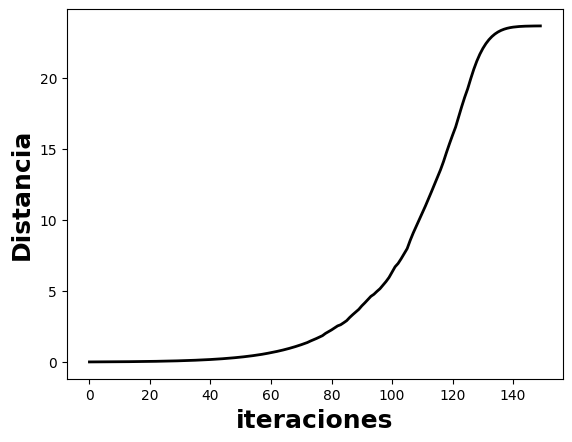

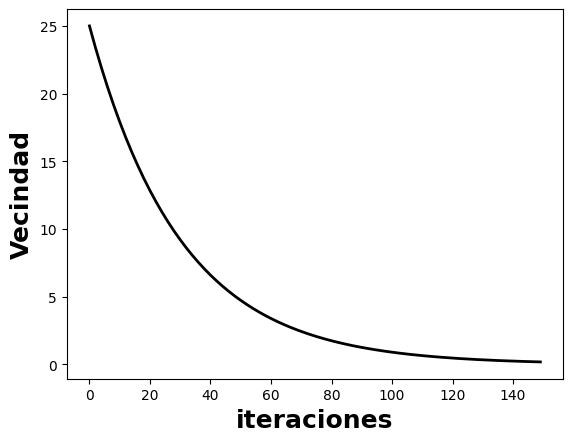

Text(0, 0.5, 'Funcion de vecindad')

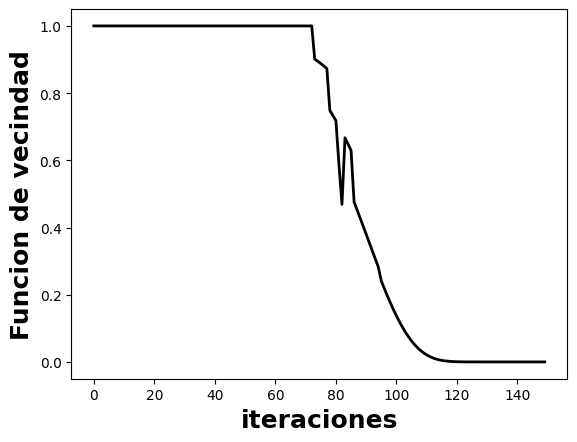

In [ ]:
#primera intento, funciona mal
data1=X_scaled
n_datos=len(data1)
n_features=len(data1[0])


#Neuronas
neurona_X= 5
neurona_Y=5
#--------------------------------------------------------------------------------
#se inicializa la matriz de pesos, tendrá filas y columnas equivalentes a las neuronas y z igual a los features
W=np.zeros((neurona_X,neurona_Y,n_features))

#Matriz de pesos, se genera con dos bucles
np.random.seed(1)
for i in range(neurona_X):
  for s in range(neurona_Y):
    for j in range(n_features):
      W[i,s,j]=np.random.uniform()
#--------------------------------------------------------------------------------------
C_ap=0.3 #Constante aprendizaje
sigma_cero=25
iter=0  #termino de inicialización de las iteraciones
param=5 #es el parametro ajustable que modifica a sigma
Iter_max=150
indicegauss=np.zeros((neurona_X,neurona_Y))  #se inicializa el vector que almacena la función de vecindad
Distancia_general=np.zeros(Iter_max)  #se inicializa el vector del desempeño general
sigma_iter=np.zeros(Iter_max)  #se inicializa el vector que almacena sigma
F_A=np.zeros(Iter_max)  #se inicializa el vector que almacena la función de vecindad con las iteraciones
Matriz_activacion=np.zeros((neurona_X*neurona_Y,Iter_max))
#-----------------------------------------------------------------------------------------------------------
while (iter<Iter_max):   #al actualizar el contador, funciona como un bucle for
  aprendizaje=C_ap
  sigma=sigma_cero*math.exp(-param*(iter/Iter_max))
  sigma_iter[iter]=sigma

  for i in range(n_datos):

    C=np.zeros((neurona_X,neurona_Y))
    for j in range(n_features):
      C=C+((data1[i,j]-W[:,:,j])**2)
    distancia=np.sqrt(C)
    #Busqueda del minimo
    Distancia_minima= np.min(distancia)
    m, n = distancia.argmin()//distancia.shape[1], distancia.argmin()%distancia.shape[1]

    Matriz_activacion[m*5+n,iter]=Matriz_activacion[m*5+n,iter]+1

    for disx in range(neurona_X):
      for disy in range(neurona_Y):
      #se calcula la función de vecindad
        distancia = np.linalg.norm(np.array([disx,disy]) - np.array([m, n]))
        resultado=-distancia/(2*(sigma**2))
        indicegauss[disx,disy]=math.exp(resultado)
        #indicegauss[disx,disy]=math.exp((-((disx-m)**2))/(2*(sigma**2))+(-((disy-n)**2))/(2*(sigma**2)))
      #se actualizan los pesos
    for p in range(neurona_X):
      for r in range(neurona_Y):
        for q in range(n_features):
          W[p,r,q]=W[p,r,q]+aprendizaje*indicegauss[p,r]*(data1[i,q]-W[p,r,q])

  F_A[iter]=indicegauss[disx,disy]
  A=0
  B=0
  for j in range(neurona_X):
    B=0
    for ñ in range(neurona_Y-1):
      for k in range(n_features):
        B=B+((W[j,ñ,k]-W[j,ñ+1,k])**2)
    A=A+math.sqrt(B)
  Distancia_general[iter]=A
  iter=iter+1
#-----------------------------------------------------------------------------------
fig= plt.plot(Distancia_general, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Distancia", fontweight='bold', fontsize=18)
plt.show()

fig= plt.plot(sigma_iter, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Vecindad", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(F_A, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Funcion de vecindad", fontweight='bold', fontsize=18)

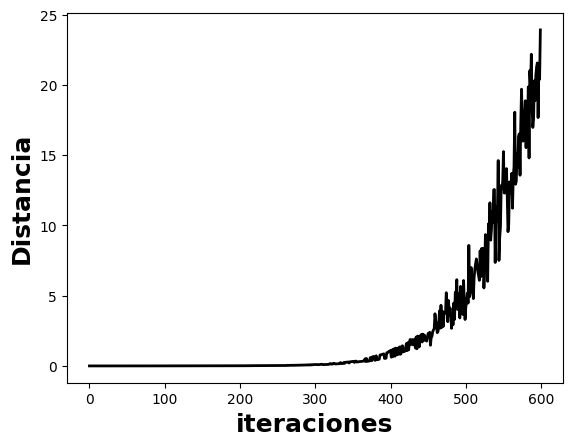

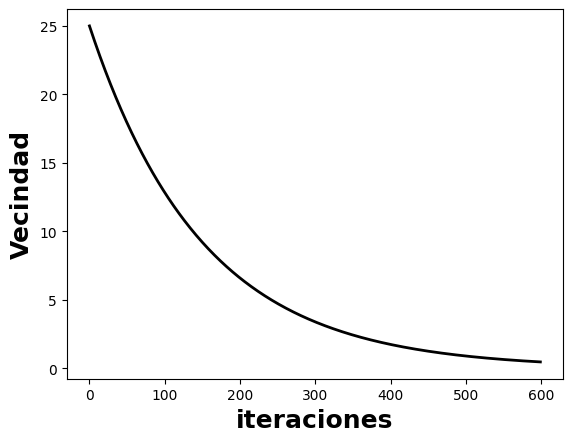

Text(0, 0.5, 'Funcion de vecindad')

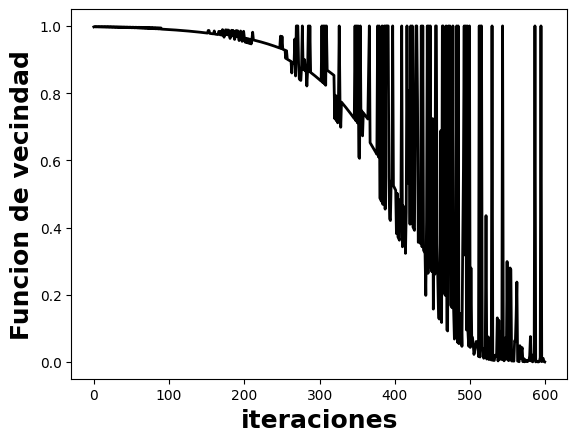

In [ ]:
#segundo intento, funciona mal
data1=X_scaled
n_datos=len(data1)
n_features=len(data1[0])

neurona_X= 5
neurona_Y=5
#--------------------------------------------------------------------------------
#se inicializa la matriz de pesos, tendrá filas y columnas equivalentes a las neuronas y z igual a los features
W=np.zeros((neurona_X,neurona_Y,n_features))
#Matriz de pesos, se genera con dos bucles
np.random.seed(1)
for i in range(neurona_X):
  for s in range(neurona_Y):
    for j in range(n_features):
      W[i,s,j]=np.random.uniform()
#--------------------------------------------------------------------------------------
C_ap=0.5
sigma_cero=25
iter=0
param=4
Iter_max=600
indicegauss=np.zeros((neurona_X,neurona_Y))
Distancia_general=np.zeros(Iter_max)
sigma_iter=np.zeros(Iter_max)
F_A=np.zeros(Iter_max)
Matriz_activacion=np.zeros((neurona_X*neurona_Y,Iter_max))
#-----------------------------------------------------------------------------------------------------------
while (iter<Iter_max):   #al actualizar el contador, funciona como un bucle for
  aprendizaje=C_ap
  sigma=sigma_cero*math.exp(-param*(iter/Iter_max))
  sigma_iter[iter]=sigma


  for i in range(n_datos):

    for j in range(n_features):
      C=np.zeros((neurona_X,neurona_Y))

      for ñ in range(n_datos):
        C=C+((data1[ñ,j]-W[:,:,j])**2)

      distancia=np.sqrt(C)

    #Busqueda del minimo
      Distancia_minima= np.min(distancia)
      m, n = distancia.argmin()//distancia.shape[1], distancia.argmin()%distancia.shape[1]

      Matriz_activacion[m*5+n,iter]=Matriz_activacion[m*5+n,iter]+1

      for disx in range(neurona_X):
        for disy in range(neurona_Y):
          distancia = np.linalg.norm(np.array([disx,disy]) - np.array([m, n]))
          resultado=-distancia/(2*(sigma**2))
          indicegauss[disx,disy]=math.exp(resultado)
        #indicegauss[disx,disy]=math.exp((-((disx-m)**2))/(2*(sigma**2))+(-((disy-n)**2))/(2*(sigma**2)))
      #se actualizan los pesos
      for p in range(neurona_X):
        for r in range(neurona_Y):
          for q in range(n_features):
            W[p,r,q]=W[p,r,q]+aprendizaje*indicegauss[p,r]*(data1[i,q]-W[p,r,q])

  F_A[iter]=indicegauss[disx,disy]
  A=0
  B=0
  for j in range(neurona_X):
    B=0
    for ñ in range(neurona_Y-1):
      for k in range(n_features):
        B=B+((W[j,ñ,k]-W[j,ñ+1,k])**2)
    A=A+math.sqrt(B)
  Distancia_general[iter]=A
  iter=iter+1
#-----------------------------------------------------------------------------------
fig= plt.plot(Distancia_general, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Distancia", fontweight='bold', fontsize=18)
plt.show()

fig= plt.plot(sigma_iter, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Vecindad", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(F_A, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Funcion de vecindad", fontweight='bold', fontsize=18)

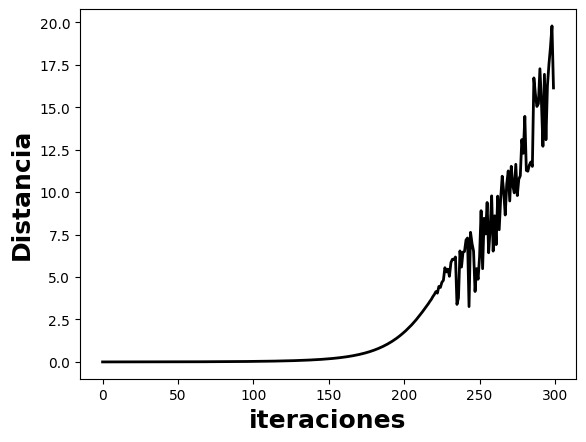

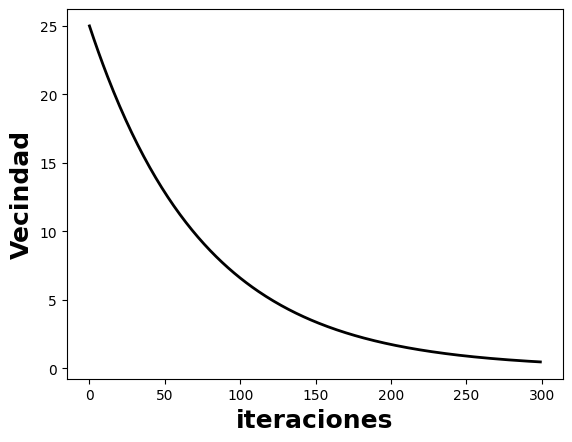

Text(0, 0.5, 'Funcion de vecindad')

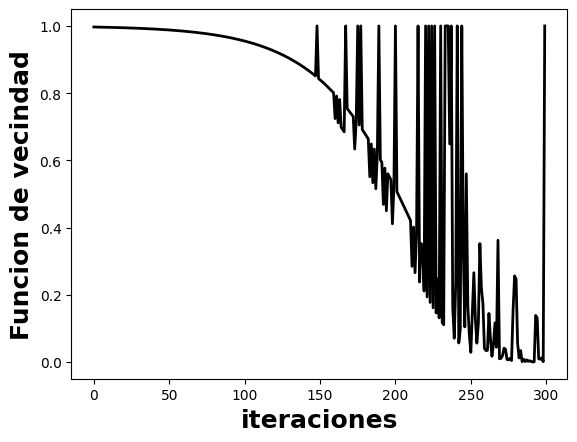

In [ ]:
#tercer intento, funciona mal
data1=X_scaled
n_datos=len(data1)
n_features=len(data1[0])

neurona_X= 5
neurona_Y=5
#--------------------------------------------------------------------------------
W=np.zeros((neurona_X,neurona_Y,n_features))

#seed 1

#W = np.random.normal(loc=0.0, scale=1.0, size=(neurona_X,neurona_Y,n_features))
np.random.seed(1)
W=np.random.uniform(low=-1.0, high=1.0, size=(5, 5, 7))
#--------------------------------------------------------------------------------------
C_ap=0.5 #Constante aprendizaje
sigma_cero=25
iter=0  #termino de inicialización de las iteraciones
param=4
indicegauss=np.zeros((neurona_X,neurona_Y))
Distancia_general=np.zeros(Iter_max)
sigma_iter=np.zeros(Iter_max)
F_A=np.zeros(Iter_max)
Matriz_activacion=np.zeros((neurona_X*neurona_Y,Iter_max))
#-----------------------------------------------------------------------------------------------------------

while (iter<Iter_max):   #al actualizar el contador, funciona como un bucle for
  aprendizaje=C_ap
  sigma=sigma_cero*math.exp(-param*(iter/Iter_max))
  sigma_iter[iter]=sigma


  for i in range(n_datos):

    for j in range(n_features):
      C=np.zeros((neurona_X,neurona_Y))


      C=((data1[i,j]-W[:,:,j])**2)

      distancia1=np.sqrt(C)

      Distancia_minima= np.min(distancia1)
      m, n = distancia1.argmin()//distancia1.shape[1], distancia1.argmin()%distancia1.shape[1]

      Matriz_activacion[m*5+n,iter]=Matriz_activacion[m*5+n,iter]+1

      for disx in range(neurona_X):
        for disy in range(neurona_Y):

          distancia = np.linalg.norm(np.array([disx,disy]) - np.array([m, n]))
          resultado=-distancia/(2*(sigma**2))
          indicegauss[disx,disy]=math.exp(resultado)
        #indicegauss[disx,disy]=math.exp((-((disx-m)**2))/(2*(sigma**2))+(-((disy-n)**2))/(2*(sigma**2)))
      #se actualizan los pesos
      for p in range(neurona_X):
        for r in range(neurona_Y):
          for q in range(n_features):
            W[p,r,q]=W[p,r,q]+aprendizaje*indicegauss[p,r]*(data1[i,q]-W[p,r,q])

  F_A[iter]=indicegauss[disx,disy]
  A=0
  B=0
  for j in range(neurona_X):
    B=0
    for ñ in range(neurona_Y-1):
      for k in range(n_features):
        B=B+((W[j,ñ,k]-W[j,ñ+1,k])**2)
    A=A+math.sqrt(B)
  Distancia_general[iter]=A
  iter=iter+1
#-----------------------------------------------------------------------------------
fig= plt.plot(Distancia_general, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Distancia", fontweight='bold', fontsize=18)
plt.show()

fig= plt.plot(sigma_iter, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Vecindad", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(F_A, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Funcion de vecindad", fontweight='bold', fontsize=18)

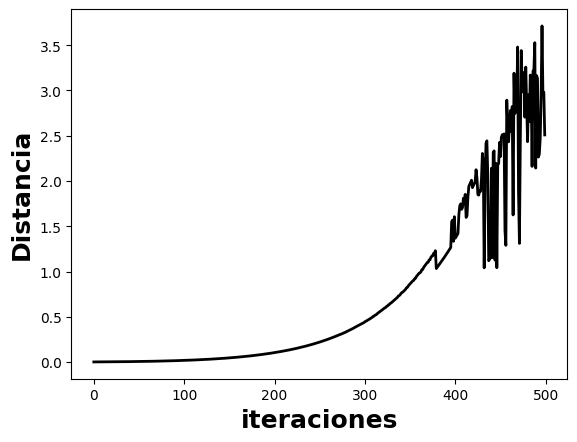

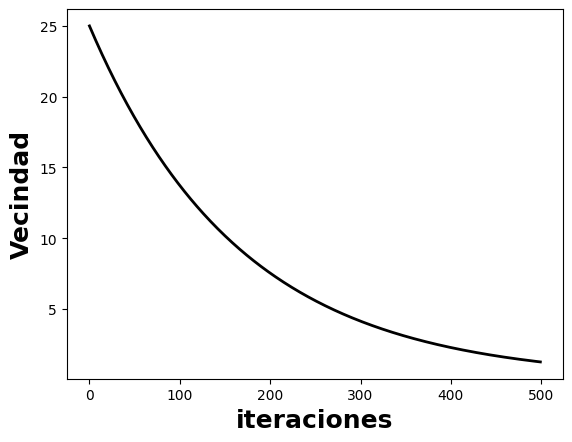

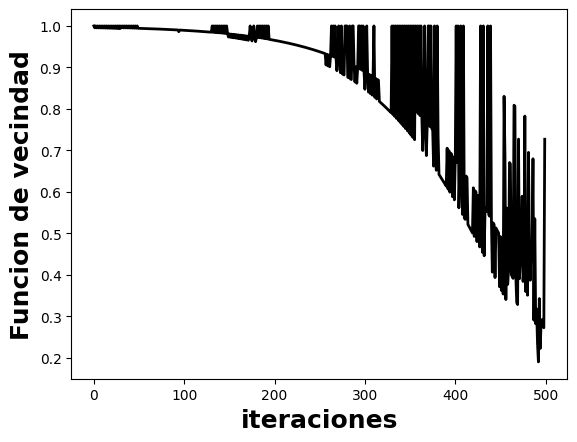

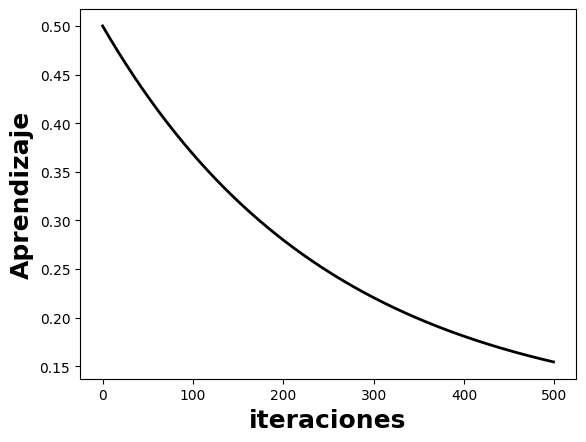

Text(0, 0.5, 'Aprendizaje * Funcion de vecindad')

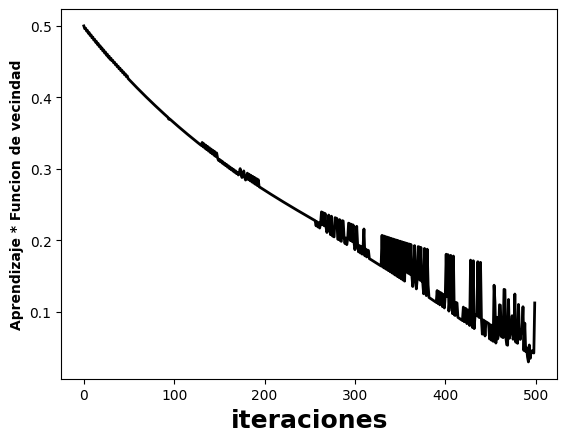

In [ ]:
#cuarto intento, funciona bien
data1=X_scaled
n_datos=len(data1)
n_features=len(data1[0])


#Neuronas
neurona_X= 5
neurona_Y=5
#--------------------------------------------------------------------------------

#seed 1

#W = np.random.normal(loc=0.0, scale=1.0, size=(neurona_X,neurona_Y,n_features))
np.random.seed(60)
W=np.random.uniform(low=-1.0, high=1.0, size=(5, 5, 7))
#--------------------------------------------------------------------------------------
Iter_max=500
#0.4
C_ap=0.4 #Constante aprendizaje
sigma_cero=25
iter=0  #termino de inicialización de las iteraciones
#3
param=3
indicegauss=np.zeros((neurona_X,neurona_Y))
Distancia_general=np.zeros(Iter_max)
sigma_iter=np.zeros(Iter_max)
Aprendizaje=np.zeros(Iter_max)
Beta_aprend=2
F_A=np.zeros(Iter_max)
Matriz_activacion=np.zeros((neurona_X*neurona_Y,Iter_max))
#-----------------------------------------------------------------------------------------------------------

while (iter<Iter_max):   #al actualizar el contador, funciona como un bucle for

  aprendizaje=C_ap*math.exp(-Beta_aprend*(iter/Iter_max)) +0.1

  Aprendizaje[iter]=aprendizaje
  sigma=sigma_cero*math.exp(-param*(iter/Iter_max))
  sigma_iter[iter]=sigma


  for i in range(n_datos):

    for j in range(n_features):
      C=np.zeros((neurona_X,neurona_Y))


      C=((data1[i,j]-W[:,:,j])**2)

      distancia1=np.sqrt(C)

    #Busqueda del minimo
      Distancia_minima= np.min(distancia1)


      pos_min = np.unravel_index(np.argmin(distancia1), distancia1.shape)

      m, n = pos_min[0], pos_min[1]

      Matriz_activacion[m*5+n,iter]=Matriz_activacion[m*5+n,iter]+1

      for disx in range(neurona_X):
        for disy in range(neurona_Y):
        #se calcula la función de vecindad
          distancia = np.linalg.norm(np.array([disx,disy]) - np.array([m, n]))
          resultado=-distancia/(2*(sigma**2))
          indicegauss[disx,disy]=math.exp(resultado)
        #indicegauss[disx,disy]=math.exp((-((disx-m)**2))/(2*(sigma**2))+(-((disy-n)**2))/(2*(sigma**2)))
      #se actualizan los pesos
      for p in range(neurona_X):
        for r in range(neurona_Y):
          for q in range(n_features):
            W[p,r,q]=W[p,r,q]+aprendizaje*indicegauss[p,r]*(data1[i,q]-W[p,r,q])

  F_A[iter]=indicegauss[disx,disy]
  A=0
  B=0
  for j in range(neurona_X):
    B=0
    for ñ in range(neurona_Y-1):
      for k in range(n_features):
        B=B+((W[j,ñ,k]-W[j,ñ+1,k])**2)
    A=A+math.sqrt(B)
  Distancia_general[iter]=A
  iter=iter+1
#-----------------------------------------------------------------------------------
fig= plt.plot(Distancia_general, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Distancia", fontweight='bold', fontsize=18)
plt.show()

fig= plt.plot(sigma_iter, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Vecindad", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(F_A, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Funcion de vecindad", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(Aprendizaje, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Aprendizaje", fontweight='bold', fontsize=18)

plt.show()

fig= plt.plot(Aprendizaje*F_A, marker="o", color="black",markersize=0,linewidth=2)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Aprendizaje * Funcion de vecindad", fontweight='bold', fontsize=10)

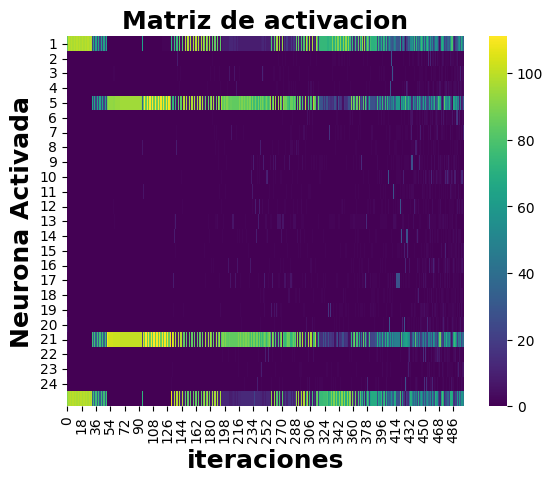

In [ ]:
#se define la matriz de activación
sns.heatmap(Matriz_activacion, annot=False, cmap='viridis', cbar=True)
plt.title('Matriz de activacion', fontweight='bold', fontsize=18)
plt.xlabel("iteraciones", fontweight='bold', fontsize=18)
plt.ylabel("Neurona Activada", fontweight='bold', fontsize=18)
plt.yticks(ticks=np.arange(24) + 0.5, labels=np.arange(1, 25), rotation=0)
plt.xlim(0, Iter_max)
plt.show()

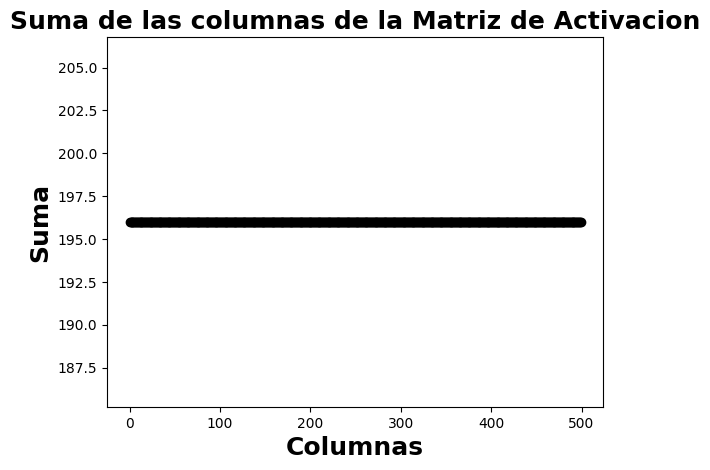

In [ ]:
#se corrobora que se active las cantidades adecuadas de neuronas
suma_columnas = Matriz_activacion.sum(axis=0)

plt.plot(suma_columnas, marker='o', linestyle='-', color='black')
plt.title('Suma de las columnas de la Matriz de Activacion', fontweight='bold', fontsize=18)
plt.xlabel('Columnas', fontweight='bold', fontsize=18)
plt.ylabel('Suma', fontweight='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Matriz U inicial')

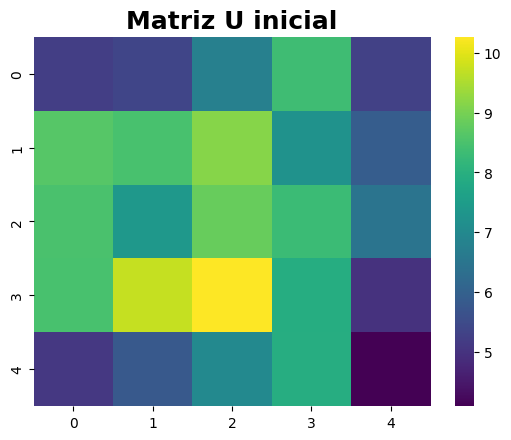

In [ ]:
#no correr, sobreescribe a W
np.random.seed(1)
W=np.random.uniform(low=-1.0, high=1.0, size=(5, 5, 7))

filas, columnas, num_atributos = W.shape


U = np.zeros((filas, columnas))

# Se calcula la suma de las distancias entre cada neurona y sus vecinas para todos los atributos
for i in range(filas):
    for j in range(columnas):
        distancias = []

        # Vecinos (arriba, abajo, izquierda, derecha)
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ni, nj = i + di, j + dj

            # se verificar que el vecino esté dentro de los límites
            if 0 <= ni < filas and 0 <= nj < columnas:
                distancia = np.linalg.norm(W[i, j] - W[ni, nj])
                distancias.append(distancia)

        U[i, j] = sum(distancias)
sns.heatmap(U, annot=False, cmap='viridis', cbar=True)
plt.title('Matriz U inicial', fontweight='bold', fontsize=18)

<Axes: >

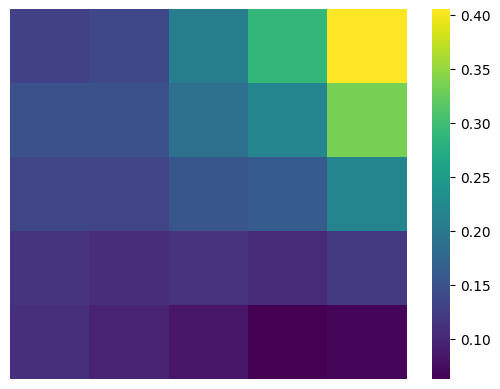

In [ ]:
#matriz para cada atributo
atributo =3

filas, columnas = W.shape[0], W.shape[1]

# se Inicializa la matriz U
U = np.zeros((filas, columnas))


for i in range(filas):
    for j in range(columnas):
        distancias = []
        cont=0

        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ni, nj = i + di, j + dj

            if 0 <= ni < filas and 0 <= nj < columnas:
                distancia = np.abs(W[i, j, atributo] - W[ni, nj, atributo])
                distancias.append(distancia)
                cont=cont+1


        U[i, j] = (sum(distancias))/cont

sns.heatmap(U, annot=False, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)


Text(0.5, 1.0, 'Matriz U')

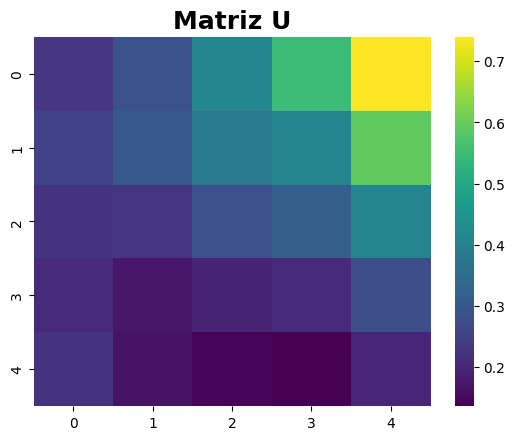

In [ ]:
#calculo de la matriz U global
filas, columnas, num_atributos = W.shape


U = np.zeros((filas, columnas))


for i in range(filas):
    for j in range(columnas):
        distancias = []

        cont=0
        # Vecinos (arriba, abajo, izquierda, derecha)
        for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ni, nj = i + di, j + dj

            # Verificar que el vecino esté dentro de los límites
            if 0 <= ni < filas and 0 <= nj < columnas:

                distancia = np.linalg.norm(W[i, j] - W[ni, nj])
                distancias.append(distancia)
                cont=cont+1

        U[i, j] = (sum(distancias))/cont

sns.heatmap(U, annot=False, cmap='viridis', cbar=True)
plt.title('Matriz U', fontweight='bold', fontsize=18)

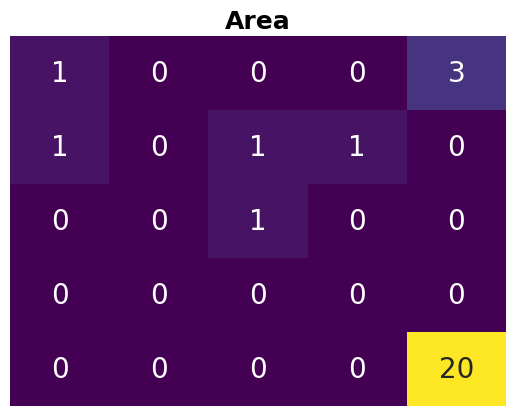

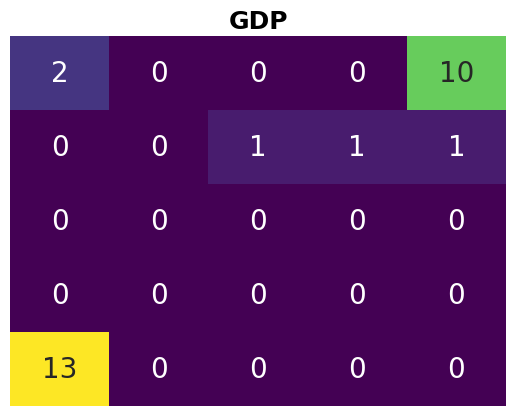

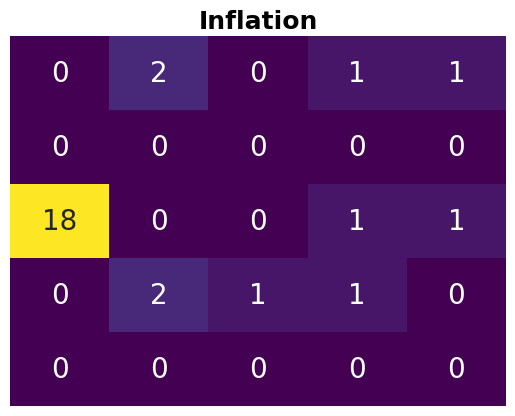

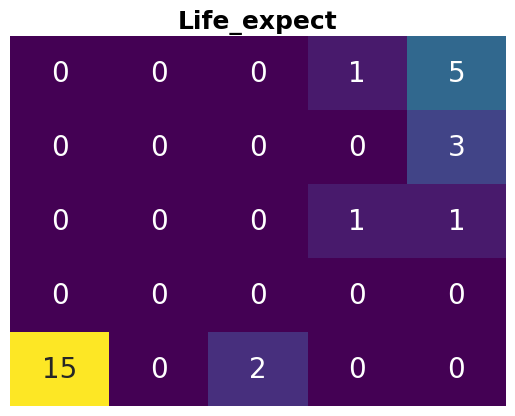

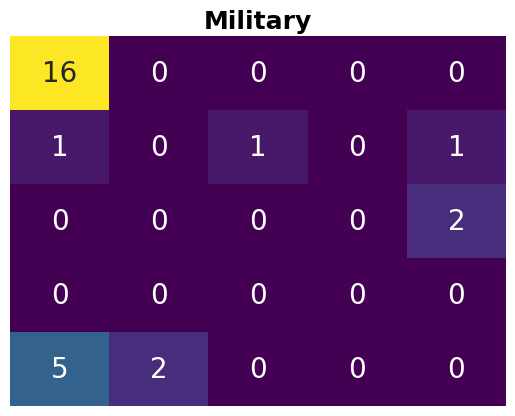

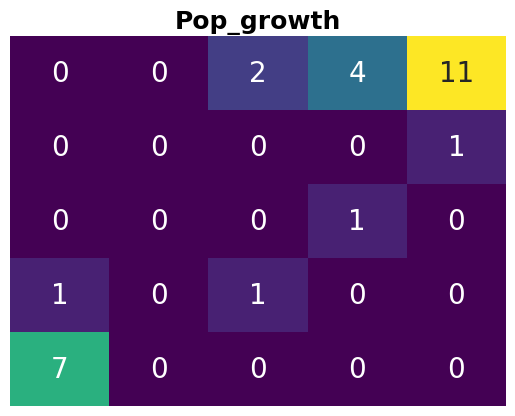

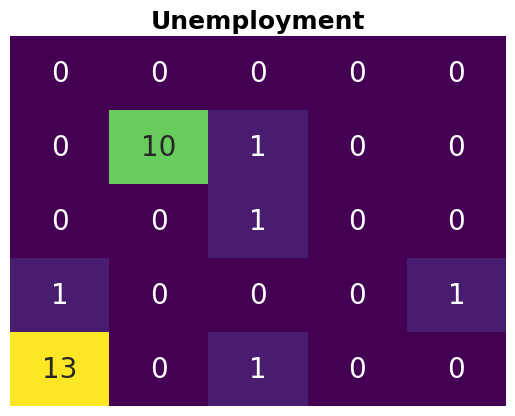

In [ ]:
#se calcula la cantidad que activa una neurona
Xdata=X_scaled

conteo = np.zeros((5, 5, len(variables)))

def distancia(a, b):
    return np.linalg.norm(a - b)


for k in range(W.shape[2]):

    for dato in Xdata:

        mejor_neurona = None
        menor_distancia = float('inf')


        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                dist = distancia(dato[k], W[i, j, k])
                if dist < menor_distancia:
                    menor_distancia = dist
                    mejor_neurona = (i, j)


        conteo[mejor_neurona[0], mejor_neurona[1], k] += 1


for k in range(len(variables)):
    sns.heatmap(conteo[:, :, k], annot=True, cmap='viridis', cbar=False
                 , xticklabels=False, yticklabels=False, annot_kws={"size": 20})
    plt.title(f'{variables[k]}',fontweight='bold', fontsize=18)
    plt.show()

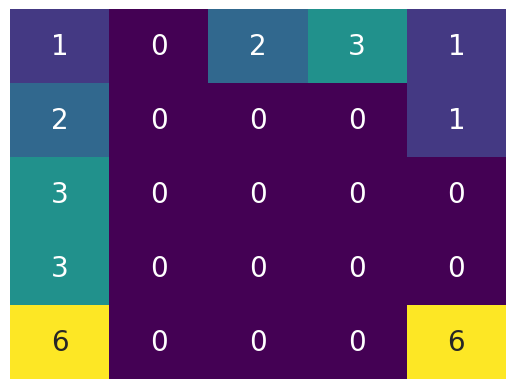

In [ ]:
#lo mismo, pero para la matriz global
conteo = np.zeros((5, 5))


def distancia(a, b):
    return np.linalg.norm(a - b)

for dato in X_scaled:
    mejor_neurona = None
    menor_distancia = float('inf')

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):

            dist = distancia(dato, W[i, j])
            if dist < menor_distancia:
                menor_distancia = dist
                mejor_neurona = (i, j)


    conteo[mejor_neurona[0], mejor_neurona[1]] += 1


sns.heatmap(conteo, annot=True, cmap='viridis', cbar=False,
             xticklabels=False, yticklabels=False, annot_kws={"size": 20})
plt.show()

In [ ]:
#se muestra a que pais corresponde cada activación de neurona
paises = df["Country"].tolist()
Xdata=X_scaled

datos_por_neurona = { (i, j): [] for i in range(5) for j in range(5) }

def distancia(a, b):
    return np.linalg.norm(a - b)

for idx, dato in enumerate(Xdata):
    mejor_neurona = None
    menor_distancia = float('inf')

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            dist = distancia(dato, W[i, j])
            if dist < menor_distancia:
                menor_distancia = dist
                mejor_neurona = (i, j)

    datos_por_neurona[mejor_neurona].append(paises[idx])

for neurona, paises_en_neurona in datos_por_neurona.items():
    print(f"Neurona {neurona}:")
    for pais in paises_en_neurona:
        print(pais)
    print()


Neurona (0, 0):
Slovakia

Neurona (0, 1):

Neurona (0, 2):
Hungary
Lithuania

Neurona (0, 3):
Bulgaria
Estonia
Latvia

Neurona (0, 4):
Ukraine

Neurona (1, 0):
Czech Republic
Germany

Neurona (1, 1):

Neurona (1, 2):

Neurona (1, 3):

Neurona (1, 4):
Poland

Neurona (2, 0):
Finland
Iceland
Sweden

Neurona (2, 1):

Neurona (2, 2):

Neurona (2, 3):

Neurona (2, 4):

Neurona (3, 0):
Italy
Norway
Switzerland

Neurona (3, 1):

Neurona (3, 2):

Neurona (3, 3):

Neurona (3, 4):

Neurona (4, 0):
Greece
Ireland
Luxembourg
Portugal
Spain
United Kingdom

Neurona (4, 1):

Neurona (4, 2):

Neurona (4, 3):

Neurona (4, 4):
Austria
Belgium
Croatia
Denmark
Netherlands
Slovenia



# **Ejercicio 1.2**

In [ ]:
#se cargan los datos y se crea el dataframe
data = {
    "Country": [
        "Austria", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
        "Estonia", "Finland", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
        "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", "Norway",
        "Poland", "Portugal", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Area": [
        83871, 30528, 110879, 56594, 78867, 43094,
        45228, 338145, 357022, 131957, 93028, 103000, 70273,
        301340, 64589, 65300, 2586, 41543, 323802,
        312685, 92090, 49035, 20273, 505370, 450295,
        41277, 603550, 243610
    ],
    "GDP": [
        41600, 37800, 13800, 18000, 27100, 37000,
        20400, 36000, 38100, 26300, 19600, 38100, 40800,
        30500, 16800, 19100, 80600, 42000, 53400,
        20200, 23400, 23300, 28800, 30500, 40700,
        44500, 7200, 36500
    ],
    "Inflation": [
        3.5, 3.5, 4.2, 2.3, 1.9, 2.8,
        5, 3.3, 2.5, 3.3, 3.9, 4, 2.6,
        2.9, 4.4, 4.1, 3.4, 2.3, 1.3,
        4.2, 3.7, 3.9, 1.8, 3.1, 3,
        0.2, 8, 4.5
    ],
    "Life_expect": [
        79.91, 79.65, 73.84, 75.99, 77.38, 78.78,
        73.58, 79.41, 80.19, 80.05, 75.02, 81, 80.32,
        81.86, 72.93, 75.55, 79.75, 80.91, 80.32,
        76.25, 78.7, 76.03, 77.48, 81.27, 81.18,
        81.17, 68.74, 80.17
    ],
    "Military": [
        0.8, 1.3, 2.6, 2.39, 1.15, 1.3,
        2, 2, 1.5, 4.3, 1.75, 0, 0.9,
        1.8, 1.1, 0.9, 0.9, 1.6, 1.9,
        1.9, 2.3, 1.08, 1.7, 1.2, 1.5,
        1, 1.4, 2.7
    ],
    "Pop_growth": [
        0.03, 0.06, -0.8, -0.09, -0.13, 0.24,
        -0.65, 0.07, -0.2, 0.06, -0.18, 0.67, 1.11,
        0.38, -0.6, -0.28, 1.14, 0.45, 0.33,
        -0.08, 0.18, 0.1, -0.19, 0.65, 0.17,
        0.92, -0.63, 0.55
    ],
    "Unemployment": [
        4.2, 7.2, 9.6, 17.7, 8.5, 6.1,
        12.5, 7.8, 6, 17.4, 10.9, 7.4, 14.4,
        8.4, 12.8, 15.4, 5.7, 4.4, 3.3,
        12.4, 12.7, 13.2, 11.8, 21.7, 7.5,
        2.8, 7.9, 8.1
    ]
}

df = pd.DataFrame(data)
variables = df.columns[1:].to_numpy()
#se estandariza estandar
X = df.drop(columns=["Country"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
np.random.seed(3)
W= np.random.uniform(0, 1, X_scaled.shape[1])
tasa_aprendizaje=0.001
iteraciones=300
W_historico=np.zeros((X_scaled.shape[1],iteraciones))

for i in range(iteraciones):
    Contador=np.random.permutation(len(X_scaled))
    for j in range(len(Contador)):
      y = np.dot(X_scaled[Contador[j]], W)
      W += tasa_aprendizaje *y* (X_scaled[Contador[j]] - y * W)  # Actualización de pesos

    W_historico[:,i]=W

NameError: name 'X_scaled' is not defined

In [ ]:
inicio = time.time()

np.random.seed(3)
W=np.zeros((X_scaled.shape[1]))
W=W+np.random.uniform(-2,-1, X_scaled.shape[1])
tasa_aprendizaje=0.001
iteraciones=200
W_historico=np.zeros((X_scaled.shape[1],iteraciones))

for i in range(iteraciones):
    Contador=np.random.permutation(len(X_scaled))
    for j in range(len(Contador)):
      y = np.dot(X_scaled[Contador[j]], W)
      W += tasa_aprendizaje *y* (X_scaled[Contador[j]] - y * W)  # Actualización de pesos

    W_historico[:,i]=W

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")

Tiempo de ejecución: 0.03886675834655762 segundos


In [ ]:
print(W)

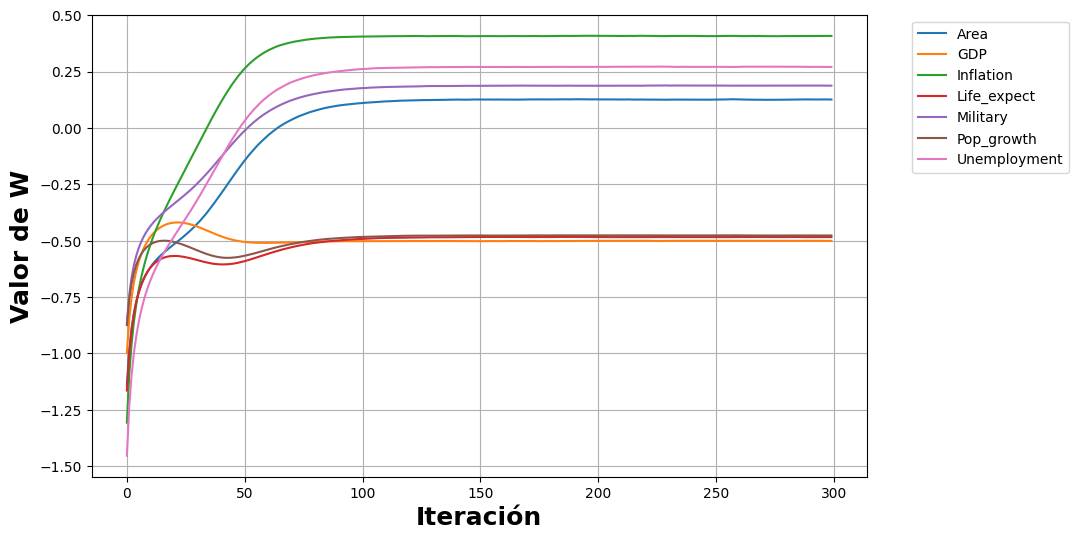

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(W_historico.shape[0]):
    plt.plot(W_historico[i], label=variables[i])

plt.xlabel('Iteración', fontweight='bold', fontsize=18)
plt.ylabel('Valor de W', fontweight='bold', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [ ]:
# Se Crea un DataFrame para las cargas
cargas_df2 = pd.DataFrame({'Variable': X.columns, 'Carga': W})

cargas_df2['Carga'] = cargas_df2['Carga']
cargas_df2 = cargas_df2.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df2, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.ylabel('')
plt.show()

In [ ]:
cargas = pca.components_[0]

# Se Crea un DataFrame para las cargas
cargas_df1 = pd.DataFrame({'Variable': X.columns, 'Carga': cargas})

cargas_df1['Carga'] = cargas_df1['Carga']
cargas_df1 = cargas_df1.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df1, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.show()

In [ ]:
cargas_df1['Método'] = 'PCA'
cargas_df2['Método'] = 'Modelo de oja'

# Concatenar ambos DataFrames
cargas_df_combined = pd.concat([cargas_df1, cargas_df2])

# Definir la paleta de colores
palette = {'PCA': '#4682B4', 'Modelo de oja': '#20B2AA'}


plt.figure(figsize=(12, 6))
sns.barplot(x='Carga', y='Variable', hue='Método', data=cargas_df_combined, palette=palette)


plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.ylabel('')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Ejercicio 2**

In [3]:
#se carga los patrones
#P1= X

P1_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [-1,  1, -1,  1, -1],
    [-1, -1,  1, -1, -1],
    [-1,  1, -1,  1, -1],
    [ 1, -1, -1, -1,  1],
])

#P2= C

P2_dato=np.array( [
    [  -1,  1,  1,  1,   1],
    [  1, -1, -1, -1,  -1],
    [  1 , -1, -1, -1,  -1],
    [ 1 , -1, -1, -1,  -1],
    [  -1,  1,  1,  1 ,  1],
])

#P3= T

P3_dato= np.array([
    [  1,  1,  1,  1,   1],
    [ -1, -1,  1, -1,  -1],
    [-1 , -1,  1, -1,  -1],
    [-1 , -1,  1, -1,  -1],
    [ -1, -1,  1, -1 , -1],
])

#P4= E
P4_dato=np.array( [
    [  1,  1,  1,  1,  -1],
    [ 1, -1, -1, -1,  -1],
    [ 1 ,  1, 1, -1,  -1],
    [ 1 , -1, -1, -1,  -1],
    [  1,  1,  1,  1 , -1],
])

#P5= F

P5_dato=np.array( [
    [ 1, 1, 1, 1,  -1],
    [ 1, -1, -1, -1,  -1],
    [1 , 1, 1, -1,  -1],
    [1 , -1, -1, -1,  -1],
    [ 1, -1, -1, -1 , -1],
])

#P6= G

P6_dato=np.array( [
    [ -1, 1, 1, 1,  -1],
    [ 1, -1, -1, -1,  -1],
    [1 , -1, 1, 1,  1],
    [1 , -1, -1, -1,  1],
    [ -1, 1, 1, 1 , -1],
])

#P7= H
P7_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [1 , 1, 1, 1,  1],
    [1 , -1, -1, -1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P8= i

P8_dato=np.array( [
    [ -1, -1, 1, -1,  -1],
    [ -1, -1, -1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [ -1, -1, 1, -1 , -1],
])

#P9= K
P9_dato= np.array([
    [ -1, 1, -1, -1,  1],
    [ -1, 1, -1, 1,  -1],
    [-1 , 1, 1, -1,  -1],
    [-1 , 1, -1, 1,  -1],
    [ -1, 1, -1, -1 , 1],
])
#P10= Y
P10_dato= np.array([
    [ 1, -1, -1, -1,  1],
    [ -1, 1, -1, 1,  -1],
    [-1 , -1, 1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [ -1, -1, 1, -1 , -1],
])



#P11= W

P11_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [1 , -1, 1, -1,  1],
    [1 , 1, -1, 1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P12= M

P12_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, 1, -1, 1,  1],
    [1 , -1, 1, -1,  1],
    [1 , -1, -1, -1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P13= N

P13_dato=np.array([
    [ 1, -1, -1, -1,  1],
    [ 1, 1, -1, -1,  1],
    [1 , -1, 1, -1,  1],
    [1 , -1, -1, 1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P14= V

P14_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [-1 , 1, -1, 1,  -1],
    [-1 , 1, -1, 1,  -1],
    [ -1, -1, 1, -1 , -1],
])

([], [])

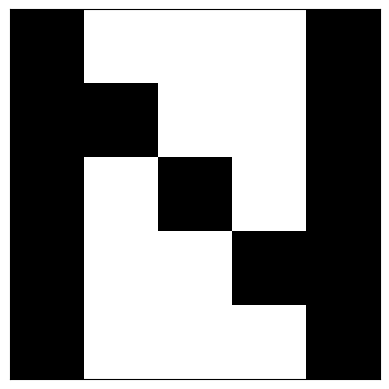

In [4]:
plt.imshow(P13_dato,cmap='gray_r', vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])

In [5]:
P1 = P1_dato.flatten()
P2 = P2_dato.flatten()
P3 = P3_dato.flatten()
P4 = P4_dato.flatten()
P5 = P5_dato.flatten()
P6 = P6_dato.flatten()
P7 = P7_dato.flatten()
P8 = P8_dato.flatten()
P9 = P9_dato.flatten()
P10 = P10_dato.flatten()
P11 = P11_dato.flatten()
P12 = P12_dato.flatten()
P13 = P13_dato.flatten()
P14 = P14_dato.flatten()

([], [])

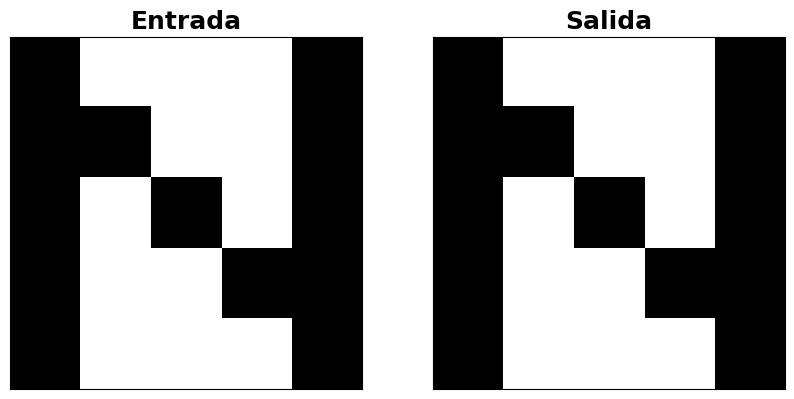

In [6]:
#se inicia el modelo
#---------------------------------------------------------------------
Neuronas=len(P1)
W=np.zeros((Neuronas,Neuronas))
# Se Crea una lista con los patrones seleccionados
patrones = [P2, P9, P8, P13]
for j in range (len(patrones)):
  producto=np.dot(np.array([patrones[j]]).transpose(),np.array([patrones[j]]))
  W=W+producto
W=W-(len(patrones))*(np.eye(Neuronas,Neuronas))
W=W / Neuronas
#------------------------------------------------------------------------------

def funcion_signo(x):
    if x > 0:
        return 1

    else:
        return -1
posicion=3
#se comprueba el aprendizaje
Resultado_modelo=np.zeros(Neuronas)
A=np.dot(np.array([patrones[posicion]]),np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo[i]=funcion_signo(B[i])

resultado=Resultado_modelo.reshape(5,5)
patron_entrada=patrones[posicion].reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

([], [])

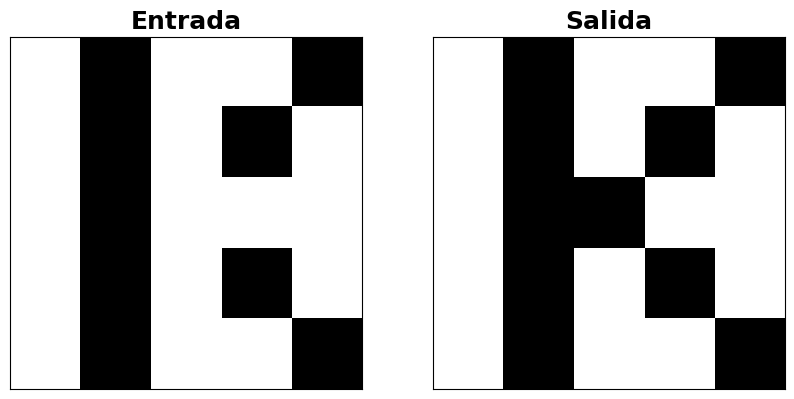

In [7]:
#se añade un patron con ruido
posicion=1
Resultado_modelo=np.zeros(Neuronas)

Entrada_ruido=np.array([patrones[posicion]])
indice = np.random.randint(0, Entrada_ruido.shape[1])

Entrada_ruido[0, indice] *= -1

A=np.dot(Entrada_ruido,np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo[i]=funcion_signo(B[i])


resultado=Resultado_modelo.reshape(5,5)
patron_entrada=Entrada_ruido.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

([], [])

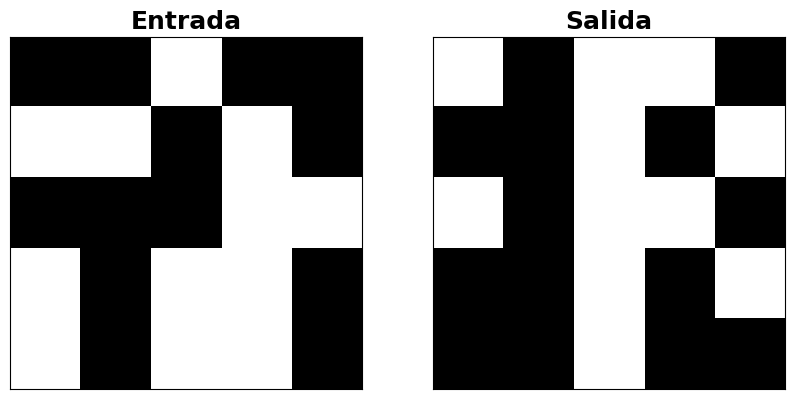

In [8]:
#se añade un patron con ruido
posicion=0
Resultado_modelo=np.zeros(Neuronas)

Entrada_ruido=np.array([patrones[posicion]])
indices = np.random.choice(Entrada_ruido.shape[1], size=12, replace=False)

for indice in indices:
    Entrada_ruido[0, indice] *= -1

A=np.dot(Entrada_ruido,np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo[i]=funcion_signo(B[i])


resultado=Resultado_modelo.reshape(5,5)
patron_entrada=Entrada_ruido.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

([], [])

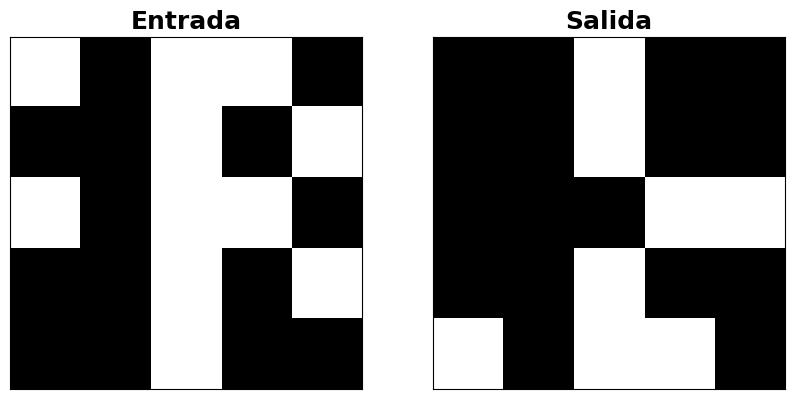

In [9]:
def funcion_signo2(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    else:
        return -1
#se comprueba el aprendizaje
Resultado_modelo2=np.zeros(Neuronas)
A=np.dot(np.array([Resultado_modelo]),np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo2[i]=funcion_signo2(B[i])
  if Resultado_modelo2[i]==0:
    Resultado_modelo2[i]=Resultado_modelo[i]

resultado=Resultado_modelo2.reshape(5,5)
patron_entrada=Resultado_modelo.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

([], [])

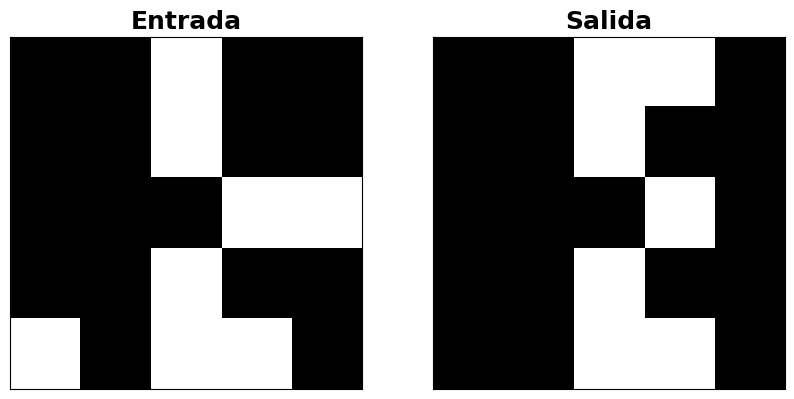

In [10]:
def funcion_signo2(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    else:
        return -1
#se comprueba el aprendizaje
Resultado_modelo3=np.zeros(Neuronas)
A=np.dot(np.array([Resultado_modelo2]),np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo3[i]=funcion_signo2(B[i])
  if Resultado_modelo3[i]==0:
    Resultado_modelo3[i]=Resultado_modelo2[i]

resultado=Resultado_modelo3.reshape(5,5)
patron_entrada=Resultado_modelo2.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

([], [])

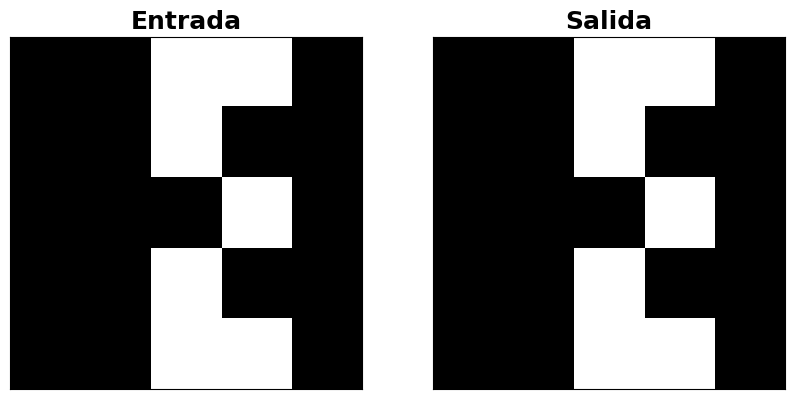

In [11]:
def funcion_signo2(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    else:
        return -1
#se comprueba el aprendizaje
Resultado_modelo4=np.zeros(Neuronas)
A=np.dot(np.array([Resultado_modelo3]),np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo4[i]=funcion_signo2(B[i])
  if Resultado_modelo4[i]==0:
    Resultado_modelo4[i]=Resultado_modelo3[i]

resultado=Resultado_modelo4.reshape(5,5)
patron_entrada=Resultado_modelo3.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

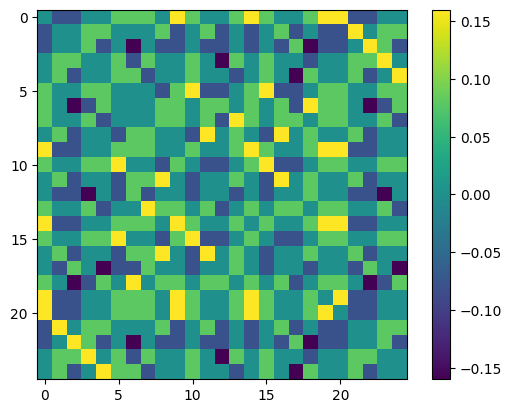

In [ ]:
#se grafica W para corroborar
plt.imshow(W, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#se analiza la diagonal principal de  W para corroborar
for i in range(Neuronas):
  print(W[i,i])


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
#se crea la funcion en la que se toma el patron predicto y se itera hasta que la entrada iguale a la salida
def funcion_signo2(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    else:
        return -1

def funcion_prediccion(Resultado_modelo2):

  A=np.dot(np.array([Resultado_modelo2]),np.array([W]))
  B=np.reshape(A,-1)
  for i in range(Neuronas):
    Resultado_modelo3[i]=funcion_signo2(B[i])
    if Resultado_modelo3[i]==0:
      Resultado_modelo3[i]=Resultado_modelo2[i]

  return Resultado_modelo3



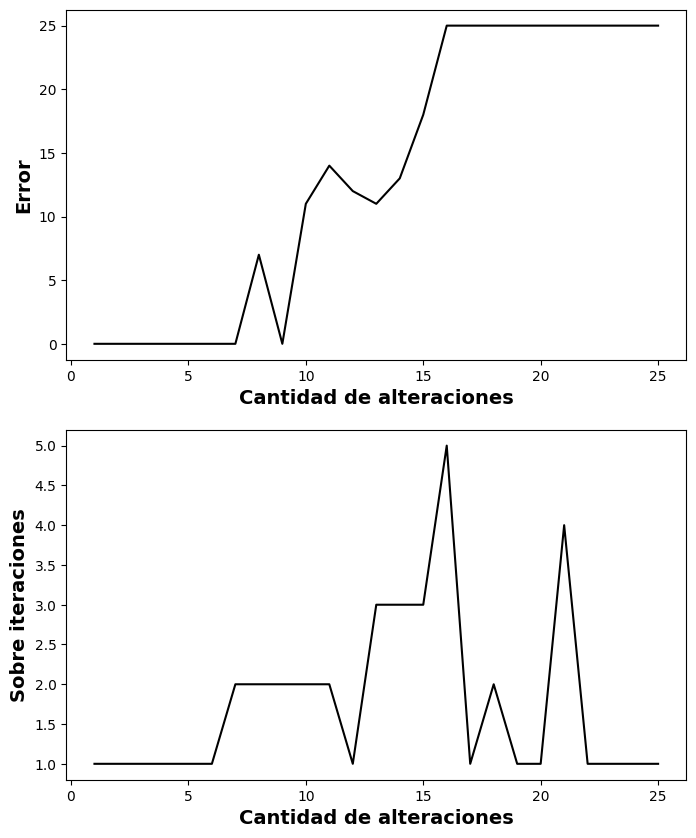

In [ ]:
#se añade un patron con ruido . se itera para calcular el error en funcion de las alteraciones
posicion=0
Resultado_modelo=np.zeros(Neuronas)
Error=np.zeros(Neuronas)
alteraciones=np.zeros(Neuronas)
sobre_iteraciones=np.zeros(Neuronas)

for j in range(Neuronas):

 Entrada_ruido=np.array([patrones[posicion]])
 patron_entrada_referencia=np.array([patrones[posicion]])
 indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

 for indice in indices:
     Entrada_ruido[0, indice] *= -1

 A=np.dot(Entrada_ruido,np.array([W]))
 B=np.reshape(A,-1)
 for i in range(Neuronas):
   Resultado_modelo[i]=funcion_signo(B[i])



 patron_entrada_referencia = patron_entrada_referencia.flatten()
 Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
 alteraciones[j]=j+1

 Diferencia=1
 Ñ=Resultado_modelo


 while Diferencia != 0:

  Q=funcion_prediccion(Ñ)

  Ñ_referencia = Ñ.flatten()
  Diferencia= np.sum(Q != Ñ_referencia)
  Ñ=Q.copy()
  sobre_iteraciones[j]=sobre_iteraciones[j]+1
  if sobre_iteraciones[j]==1000:
    break

  Error[j]= np.sum(Q != patron_entrada_referencia)
# plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
# plt.show()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))


ax1.plot(alteraciones,Error, color='black')
ax1.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax1.set_ylabel("Error", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})


ax2.plot(alteraciones,sobre_iteraciones, color='black')
ax2.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax2.set_ylabel("Sobre iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

1
1
1
1
1
1
1
1


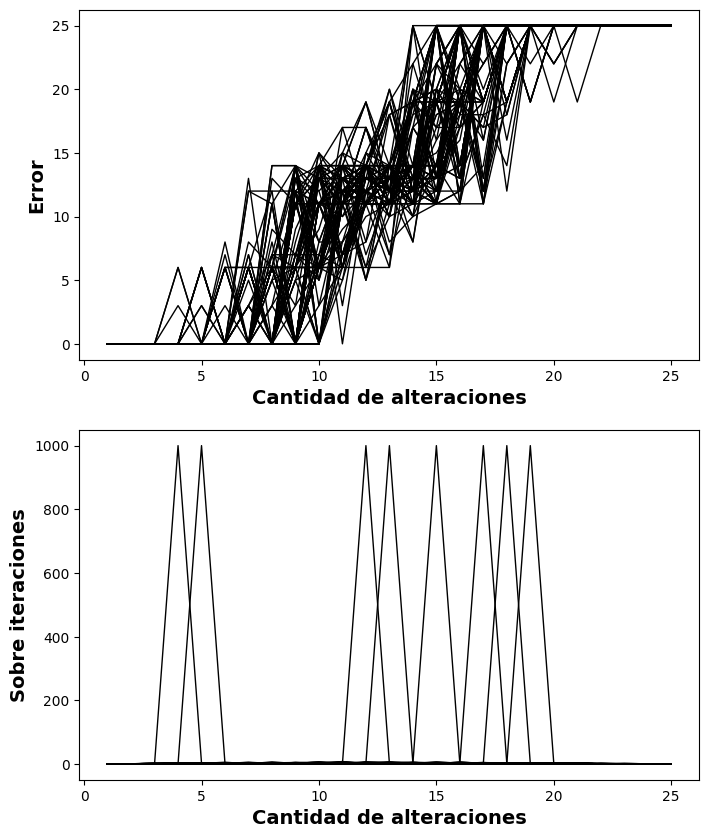

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
for z in range(100):
  posicion=0
  Resultado_modelo=np.zeros(Neuronas)
  Error=np.zeros(Neuronas)
  alteraciones=np.zeros(Neuronas)
  sobre_iteraciones=np.zeros(Neuronas)

  for j in range(Neuronas):
    Entrada_ruido=np.array([patrones[posicion]])
    patron_entrada_referencia=np.array([patrones[posicion]])
    indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

    for indice in indices:
      Entrada_ruido[0, indice] *= -1

    A=np.dot(Entrada_ruido,np.array([W]))
    B=np.reshape(A,-1)
    for i in range(Neuronas):
      Resultado_modelo[i]=funcion_signo(B[i])



    patron_entrada_referencia = patron_entrada_referencia.flatten()
    Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
    alteraciones[j]=j+1

    Diferencia=10
    Ñ=Resultado_modelo

    while Diferencia != 0:

      Q=funcion_prediccion(Ñ)

      Ñ_referencia = Ñ.flatten()
      Diferencia= np.sum(Q !=Ñ_referencia)

      Ñ=Q.copy()
      sobre_iteraciones[j]=sobre_iteraciones[j]+1
      if sobre_iteraciones[j]==1000:
        print(1)
        J=Q.copy()
        break


      Error[j]= np.sum(Q != patron_entrada_referencia)
# plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
# plt.show()



  ax1.plot(alteraciones,Error, color='black', linewidth=1)

  ax2.plot(alteraciones,sobre_iteraciones, color='black', linewidth=1)


ax1.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax1.set_ylabel("Error", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

ax2.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax2.set_ylabel("Sobre iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

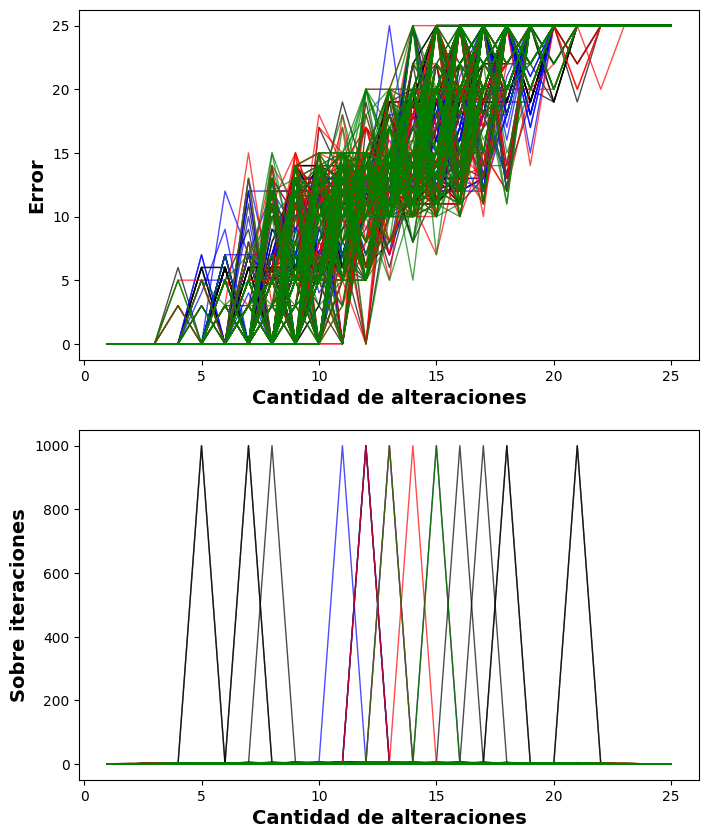

In [ ]:
#se grafica los 4 patrones al mismo tiempo
colores = ['black', 'blue', 'red', 'green', 'orange']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

iteraciones=100

for r in range(4):
  for z in range(iteraciones):
    posicion=r
    Resultado_modelo=np.zeros(Neuronas)
    Error=np.zeros(Neuronas)
    alteraciones=np.zeros(Neuronas)
    sobre_iteraciones=np.zeros(Neuronas)

    for j in range(Neuronas):
      Entrada_ruido=np.array([patrones[posicion]])
      patron_entrada_referencia=np.array([patrones[posicion]])
      indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

      for indice in indices:
        Entrada_ruido[0, indice] *= -1

      A=np.dot(Entrada_ruido,np.array([W]))
      B=np.reshape(A,-1)
      for i in range(Neuronas):
        Resultado_modelo[i]=funcion_signo(B[i])



      patron_entrada_referencia = patron_entrada_referencia.flatten()
      Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
      alteraciones[j]=j+1

      Diferencia=1
      Ñ=Resultado_modelo

      while Diferencia != 0:

        Q=funcion_prediccion(Ñ)

        Ñ_referencia = Ñ.flatten()
        Diferencia= np.sum(Q != Ñ)

        Ñ=Q.copy()
        sobre_iteraciones[j]=sobre_iteraciones[j]+1
        if sobre_iteraciones[j]==1000:
          break
      Error[j]= np.sum(Q != patron_entrada_referencia)
# plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
# plt.show()



    ax1.plot(alteraciones,Error, color=colores[r], linewidth=1, alpha=0.7)

    ax2.plot(alteraciones,sobre_iteraciones, color=colores[r], linewidth=1, alpha=0.7)


ax1.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax1.set_ylabel("Error", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

ax2.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax2.set_ylabel("Sobre iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()

In [ ]:
#se grafica los 4 patrones al mismo tiempo mediante un grafico de caja

iteraciones=1000
Matriz_error=np.zeros((4,iteraciones,Neuronas))

for r in range(4):
  for z in range(iteraciones):
    posicion=r
    Resultado_modelo=np.zeros(Neuronas)
    Error=np.zeros(Neuronas)
    alteraciones=np.zeros(Neuronas)
    sobre_iteraciones=np.zeros(Neuronas)

    for j in range(Neuronas):
      Entrada_ruido=np.array([patrones[posicion]])
      patron_entrada_referencia=np.array([patrones[posicion]])
      indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

      for indice in indices:
        Entrada_ruido[0, indice] *= -1

      A=np.dot(Entrada_ruido,np.array([W]))
      B=np.reshape(A,-1)
      for i in range(Neuronas):
        Resultado_modelo[i]=funcion_signo(B[i])



      patron_entrada_referencia = patron_entrada_referencia.flatten()
      Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
      alteraciones[j]=j+1

      Diferencia=1
      Ñ=Resultado_modelo

      while Diferencia != 0:

        Q=funcion_prediccion(Ñ)

        Ñ_referencia = Ñ.flatten()
        Diferencia= np.sum(Q != Ñ)

        Ñ=Q.copy()
        sobre_iteraciones[j]=sobre_iteraciones[j]+1
        if sobre_iteraciones[j]==1000:
          break
      Matriz_error[r,z,j]= np.sum(Q != patron_entrada_referencia)


NameError: name 'data' is not defined

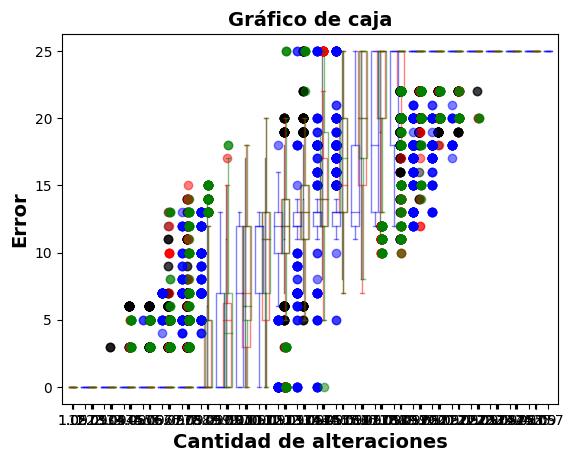

In [ ]:
data1=Matriz_error[0,:,:]
data2=Matriz_error[1,:,:]
data3=Matriz_error[2,:,:]
data4=Matriz_error[3,:,:]
# Graficar el boxplot para todas las columnas
box1 =plt.boxplot(data1, positions=np.arange(1, data1.shape[1] + 1), widths=0,
            boxprops=dict(color='black', alpha=0.5),
            medianprops=dict(color='black', alpha=0.5),
            capprops=dict(color='black', alpha=0.5),
            whiskerprops=dict(color='black', alpha=0.5),
            flierprops=dict(markerfacecolor='black', markeredgecolor='black', alpha=0.5)
            )

box3 = plt.boxplot(data3,
                   positions=np.arange(1, data3.shape[1] + 1) + 0.05,  # Desplazar para no superponerse
                   widths=0.4,
                   boxprops=dict(color='red', alpha=0.5),
                   medianprops=dict(color='red', alpha=0.5),
                   capprops=dict(color='red', alpha=0.5),
                   whiskerprops=dict(color='red', alpha=0.5),
                   flierprops=dict(markerfacecolor='red', markeredgecolor='red', alpha=0.5))

box2 = plt.boxplot(data2,
                   positions=np.arange(1, data2.shape[1] + 1) + 0.7,
                   widths=0.4,
                   boxprops=dict(color='blue', alpha=0.5),
                   medianprops=dict(color='blue', alpha=0.5),
                   capprops=dict(color='blue', alpha=0.5),
                   whiskerprops=dict(color='blue', alpha=0.5),
                   flierprops=dict(markerfacecolor='blue', markeredgecolor='blue', alpha=0.5))

box4 = plt.boxplot(data4,
                   positions=np.arange(1, data4.shape[1] + 1) + 0.09,
                   widths=0.4,
                   boxprops=dict(color='green', alpha=0.5),
                   medianprops=dict(color='green', alpha=0.5),
                   capprops=dict(color='green', alpha=0.5),
                   whiskerprops=dict(color='green', alpha=0.5),
                   flierprops=dict(markerfacecolor='green', markeredgecolor='green', alpha=0.5))


plt.title('Gráfico de caja', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.xlabel('Cantidad de alteraciones', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel('Error', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.xticks(np.arange(1, data.shape[1] + 1), np.arange(1, data.shape[1] + 1))



plt.tight_layout()
plt.show()

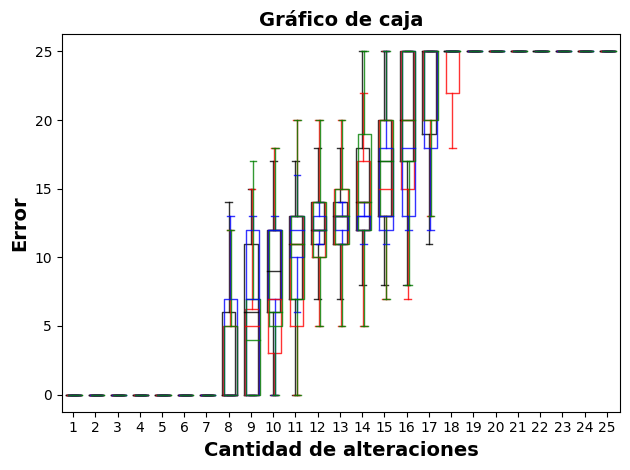

In [ ]:
data1=Matriz_error[0,:,:]
data2=Matriz_error[1,:,:]
data3=Matriz_error[2,:,:]
data4=Matriz_error[3,:,:]
t=0.8
g=0.6
# Graficar el boxplot para todas las columnas
box1 =plt.boxplot(data1, positions=np.arange(1, data1.shape[1] + 1), widths=g,
            boxprops=dict(color='black', alpha=t),
            medianprops=dict(color='black', alpha=t),
            capprops=dict(color='black', alpha=t),
            whiskerprops=dict(color='black', alpha=t),
            flierprops=dict(markerfacecolor='black', markeredgecolor='black', alpha=t, markersize=0)
            )

box3 = plt.boxplot(data3,
                   positions=np.arange(1, data3.shape[1] + 1) + 0.05,  # Desplazar para no superponerse
                   widths=g,
                   boxprops=dict(color='red', alpha=t),
                   medianprops=dict(color='red', alpha=t),
                   capprops=dict(color='red', alpha=t),
                   whiskerprops=dict(color='red', alpha=t),
                   flierprops=dict(markerfacecolor='red', markeredgecolor='red', alpha=t, markersize=0))

box2 = plt.boxplot(data2,
                   positions=np.arange(1, data2.shape[1] + 1) + 0.07,
                   widths=g,
                   boxprops=dict(color='blue', alpha=t),
                   medianprops=dict(color='blue', alpha=t),
                   capprops=dict(color='blue', alpha=t),
                   whiskerprops=dict(color='blue', alpha=t),
                   flierprops=dict(markerfacecolor='blue', markeredgecolor='blue', alpha=t, markersize=0))

box4 = plt.boxplot(data4,
                   positions=np.arange(1, data4.shape[1] + 1) + 0.09,
                   widths=g,
                   boxprops=dict(color='green', alpha=t),
                   medianprops=dict(color='green', alpha=t),
                   capprops=dict(color='green', alpha=t),
                   whiskerprops=dict(color='green', alpha=t),
                   flierprops=dict(markerfacecolor='green', markeredgecolor='green', alpha=t, markersize=0))


plt.title('Gráfico de caja', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.xlabel('Cantidad de alteraciones', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.ylabel('Error', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.xticks(np.arange(1, data1.shape[1] + 1), np.arange(1, data1.shape[1] + 1))



plt.tight_layout()
plt.show()

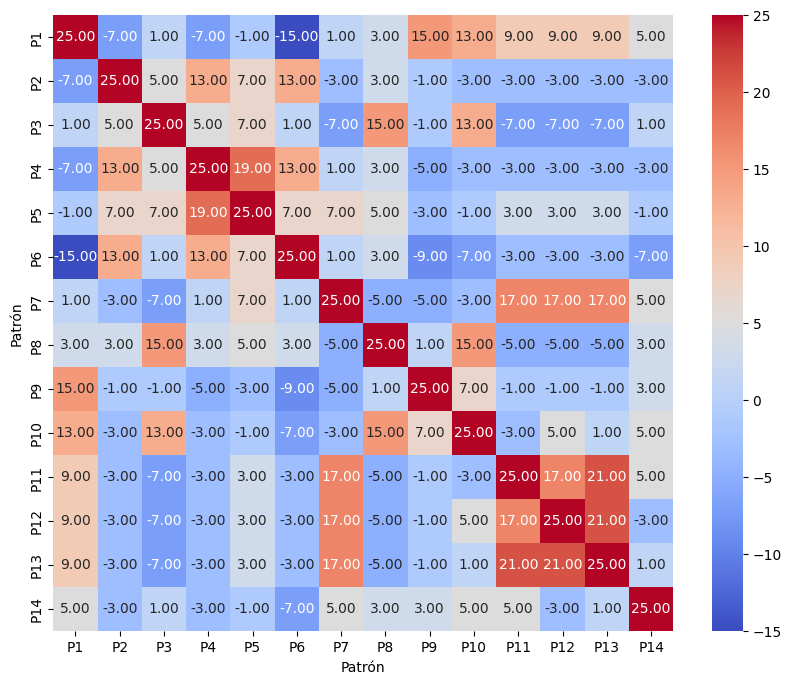

In [ ]:
#se analiza si los vectores son ortogonales


vector = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14]

# Crear una matriz de ceros para almacenar los resultados
n = len(vector)
ortogonales = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        ortogonales[i, j] = np.dot(vector[i], vector[j])


etiquetas = [f'P{i+1}' for i in range(n)]

plt.figure(figsize=(10, 8))
sns.heatmap(ortogonales, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Patrón')
plt.ylabel('Patrón')
plt.show()


Se replantea los patrones

In [ ]:
P15_dato=np.array( [
    [1, -1, -1, -1, -1],
    [-1,  -1, -1, -1, -1],
    [1, -1,  -1, -1, -1],
    [1,  -1, -1,  -1, -1],
    [1, -1, -1, -1,  -1],
])


P16_dato=np.array( [
    [ -1, -1, -1, -1, -1],
    [-1,  -1, -1, -1, -1],
    [-1, -1,  -1, -1, -1],
    [1,  -1, 1,  -1, -1],
    [ -1, 1, -1, -1,  -1],
])

P17_dato=np.array( [
    [ -1, -1, -1, -1, -1],
    [-1,  -1, -1, -1, -1],
    [-1, -1,  -1, 1, 1],
    [-1,  -1, -1,  1, -1],
    [ -1, -1, -1, 1,  1],
])

P18_dato=np.array( [
    [ -1, 1, 1, 1, -1],
    [-1,  -1, 1, -1, -1],
    [-1, -1,  1, -1, -1],
    [-1,  -1, -1,  -1, -1],
    [ -1, -1, -1, -1, -1],
])

P15 = P15_dato.flatten()
P16 = P16_dato.flatten()
P17 = P17_dato.flatten()
P18 = P18_dato.flatten()

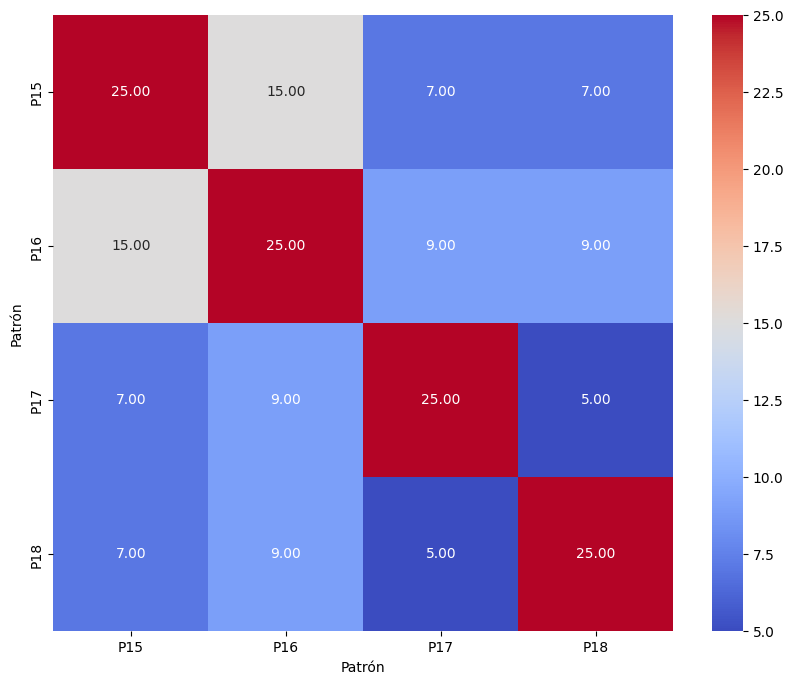

In [ ]:
vector = [P15, P16, P17, P18]

# Crear una matriz de ceros para almacenar los resultados
n = len(vector)
ortogonales = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        ortogonales[i, j] = np.dot(vector[i], vector[j])


etiquetas = [f'P{i+15}' for i in range(n)]

plt.figure(figsize=(10, 8))
sns.heatmap(ortogonales, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Patrón')
plt.ylabel('Patrón')
plt.show()


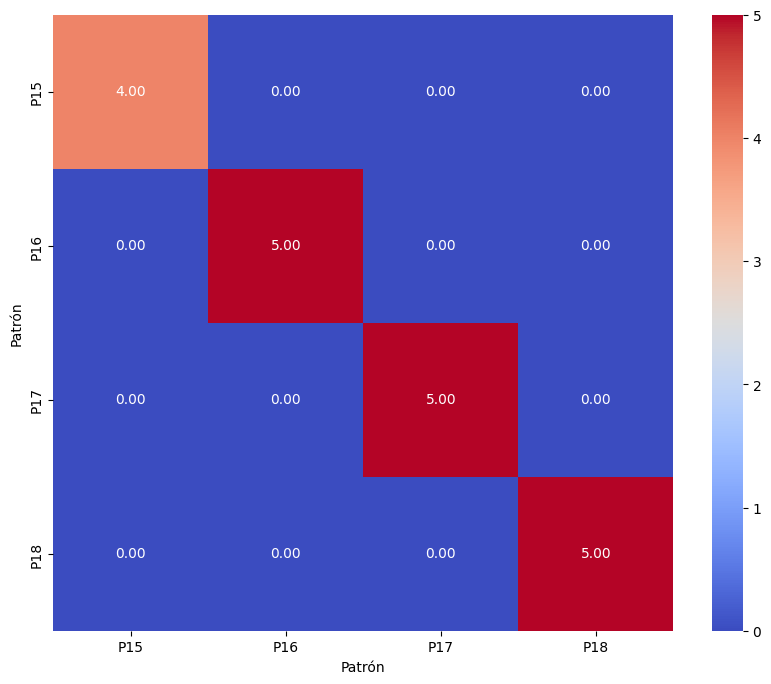

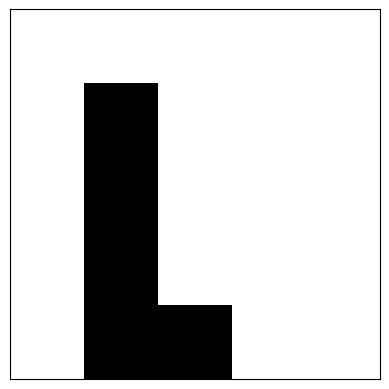

In [12]:
#se define nuevamente los patrones

P15_dato=np.array( [
    [1, 0, 0, 0, 0],
    [0,  0, 0, 0, 0],
    [1,  0, 0, 0, 0],
    [1,  0, 0, 0, 0],
    [1,  0, 0, 0, 0],
])


P16_dato=np.array( [
    [ 0,  0, 0, 0, 0],
    [0,  1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0,  1, 0, 0, 0],
    [ 0, 1, 1, 0, 0],
])

P17_dato=np.array( [
    [ 0,  0, 0, 0, 0],
    [0,  0, 0, 0, 0],
    [0,  0, 0, 1, 1],
    [0,  0, 0,  1, 0],
    [ 0, 0, 0, 1,  1],
])

P18_dato=np.array( [
    [ 0, 1, 1, 1, 0],
    [0,  0, 1, 0, 0],
    [0, 0,  1, 0, 0],
    [0, 0, 0,  0, 0],
    [ 0, 0, 0, 0,0],
])

P15 = P15_dato.flatten()
P16 = P16_dato.flatten()
P17 = P17_dato.flatten()
P18 = P18_dato.flatten()


vector = [P15, P16, P17, P18]

# Crear una matriz de ceros para almacenar los resultados
n = len(vector)
ortogonales = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        ortogonales[i, j] = np.dot(vector[i], vector[j])


etiquetas = [f'P{i+15}' for i in range(n)]

plt.figure(figsize=(10, 8))
sns.heatmap(ortogonales, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Patrón')
plt.ylabel('Patrón')
plt.show()

plt.imshow(P16_dato,cmap='gray_r', vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
#se realiza de nuevo el modelo
#se crea la funcion en la que se toma el patron predicto y se itera hasta que la entrada iguale a la salida
def funcion_signo2(x):
    if x > 0:
        return 1
    if x == 0:
        return 2
    else:
        return 0

def funcion_prediccion(Resultado_modelo2):

  A=np.dot(np.array([Resultado_modelo2]),np.array([W]))
  B=np.reshape(A,-1)
  for i in range(Neuronas):
    Resultado_modelo3[i]=funcion_signo2(B[i])
    if Resultado_modelo3[i]==2:
      Resultado_modelo3[i]=Resultado_modelo2[i]

  return Resultado_modelo3


def funcion_signo(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    else:
        return 0

In [17]:
Neuronas=len(P1)
W=np.zeros((Neuronas,Neuronas))
# Se Crea una lista con los patrones seleccionados
patrones = [P15, P16, P17, P18]
for j in range (len(patrones)):
  producto=np.dot(np.array([patrones[j]]).transpose(),np.array([patrones[j]]))
  W=W+producto
W=W-(len(patrones))*(np.eye(Neuronas,Neuronas))
W=W /(25)

In [18]:
B[15]

5.551115123125783e-17

Energía entrada: -2.42861286636753e-17
Energía salida: 0.059999999999999984
Delta: 0.06000000000000001


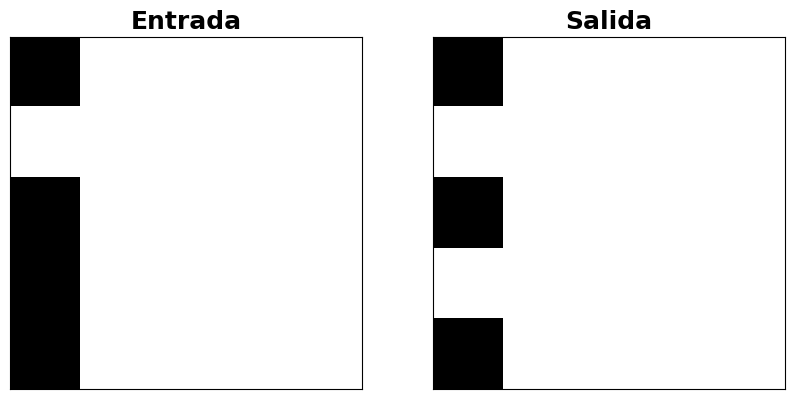

In [42]:
posicion=0
#se comprueba el aprendizaje
Resultado_modelo=np.zeros(Neuronas)

Patron=patrones[posicion]

#Patron[4]=1-Patron[4]
#Patron[14]=1-Patron[14]
A=np.dot(np.array(Patron),np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo[i]=funcion_signo(B[i])

resultado=Resultado_modelo.reshape(5,5)
patron_entrada=Patron.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=0, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=0, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

energia1 = -0.5 * np.sum(W * np.outer(patron_entrada,patron_entrada))
energia2 = -0.5 * np.sum(W * np.outer(resultado,resultado))
delta=energia2-energia1

print("Energía entrada:", energia1)
print("Energía salida:", energia2)
print("Delta:", delta)

Energía entrada: 0.059999999999999984
Energía salida: 0.06
Delta: 1.3877787807814457e-17


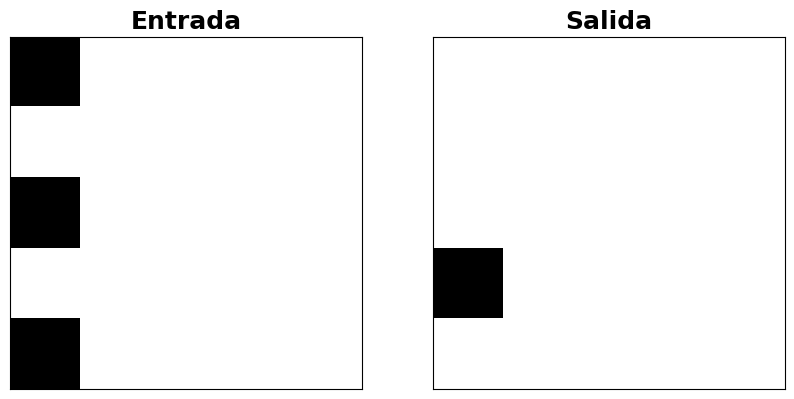

In [43]:
Entrada_modelo2=Resultado_modelo
A=np.dot(Entrada_modelo2,np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo2[i]=funcion_signo(B[i])

resultado2=Resultado_modelo2.reshape(5,5)
patron_entrada2=Entrada_modelo2.reshape(5,5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada2,cmap='gray_r', vmin=0, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado2,cmap='gray_r', vmin=0, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])


energia1 = -0.5 * np.sum(W * np.outer(patron_entrada2,patron_entrada2))
energia2 = -0.5 * np.sum(W * np.outer(resultado2,resultado2))
delta=energia2-energia1

print("Energía entrada:", energia1)
print("Energía salida:", energia2)
print("Delta:", delta)

Energía entrada: 0.06
Energía salida: 0.059999999999999984
Delta: -1.3877787807814457e-17


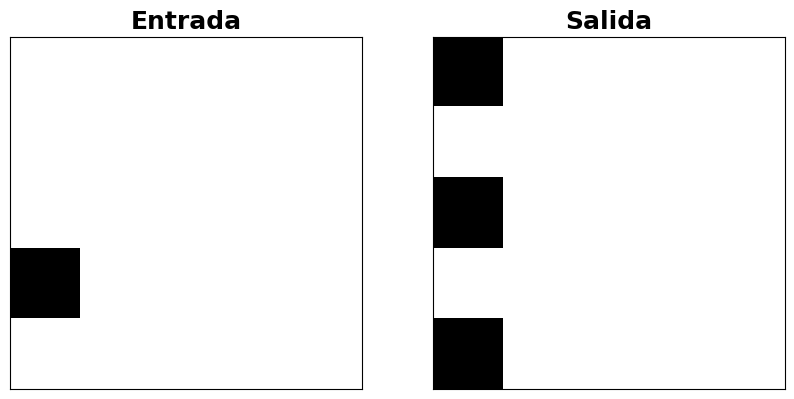

In [44]:
Entrada_modelo3=Resultado_modelo2
A=np.dot(Entrada_modelo3,np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo3[i]=funcion_signo(B[i])

resultado3=Resultado_modelo3.reshape(5,5)
patron_entrada3=Entrada_modelo3.reshape(5,5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada3,cmap='gray_r', vmin=0, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado3,cmap='gray_r', vmin=0, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

energia1 = -0.5 * np.sum(W * np.outer(patron_entrada3,patron_entrada3))
energia2 = -0.5 * np.sum(W * np.outer(resultado3,resultado3))
delta=energia2-energia1


print("Energía entrada:", energia1)
print("Energía salida:", energia2)
print("Delta:", delta)

In [ ]:
B

array([2.77555756e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.77555756e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.55111512e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.77555756e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

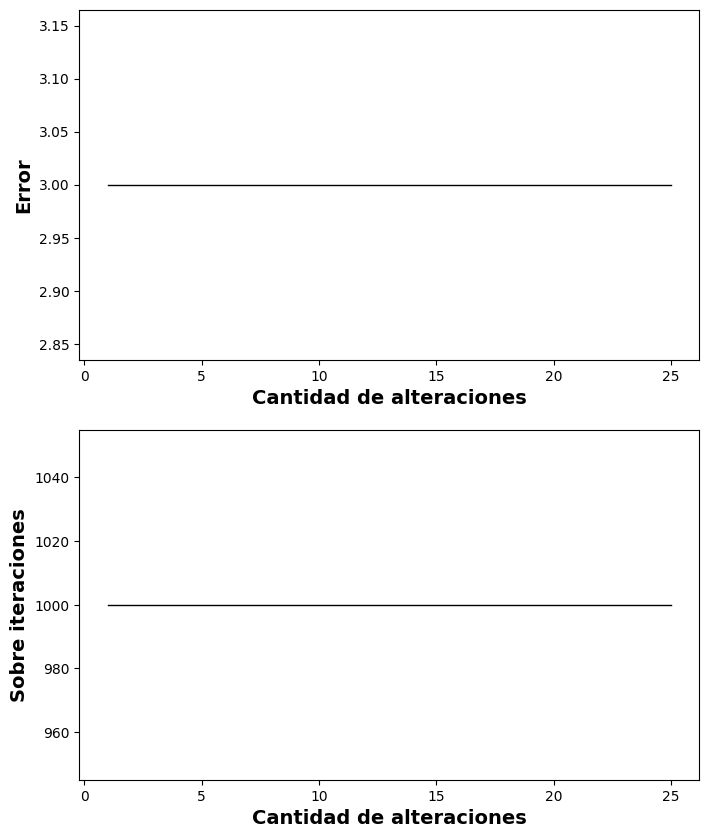

In [22]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
for z in range(100):
  posicion=2
  Resultado_modelo=np.zeros(Neuronas)
  Error=np.zeros(Neuronas)
  alteraciones=np.zeros(Neuronas)
  sobre_iteraciones=np.zeros(Neuronas)

  for j in range(Neuronas):
    Entrada_ruido=np.array([patrones[posicion]])
    patron_entrada_referencia=np.array([patrones[posicion]])
    indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

    for indice in indices:
      Entrada_ruido[0, indice] = 1 - Entrada_ruido[0, indice]

    A=np.dot(Entrada_ruido,np.array([W]))
    B=np.reshape(A,-1)
    for i in range(Neuronas):
      Resultado_modelo[i]=funcion_signo(B[i])



    patron_entrada_referencia = patron_entrada_referencia.flatten()
    Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
    alteraciones[j]=j+1

    Diferencia=10
    Ñ=Resultado_modelo

    while Diferencia != 0:

      Q=funcion_prediccion(Ñ)

      Ñ_referencia = Ñ.flatten()
      Diferencia= np.sum(Q !=Ñ_referencia)

      Ñ=Q.copy()
      sobre_iteraciones[j]=sobre_iteraciones[j]+1
      if sobre_iteraciones[j]==1000:
        J=Q.copy()
        break


      Error[j]= np.sum(Q != patron_entrada_referencia)
# plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
# plt.show()



  ax1.plot(alteraciones,Error, color='black', linewidth=1)

  ax2.plot(alteraciones,sobre_iteraciones, color='black', linewidth=1)


ax1.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax1.set_ylabel("Error", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

ax2.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax2.set_ylabel("Sobre iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()




In [23]:

posicion=0
Resultado_modelo=np.zeros(Neuronas)
Error=np.zeros(Neuronas)
alteraciones=np.zeros(Neuronas)
sobre_iteraciones=np.zeros(Neuronas)

for j in range(Neuronas):
  Entrada_ruido=np.array([patrones[posicion]])
  patron_entrada_referencia=np.array([patrones[posicion]])
  indices = np.random.choice(Entrada_ruido.shape[1], size=j+1, replace=False)

  for indice in indices:
    Entrada_ruido[0, indice] = 1 - Entrada_ruido[0, indice]

  A=np.dot(Entrada_ruido,np.array([W]))
  B=np.reshape(A,-1)
  for i in range(Neuronas):
    Resultado_modelo[i]=funcion_signo(B[i])



  patron_entrada_referencia = patron_entrada_referencia.flatten()
  Error[j]= np.sum(Resultado_modelo != patron_entrada_referencia)
  alteraciones[j]=j+1

  Diferencia=10
  Ñ=Resultado_modelo

  while Diferencia != 0:

    Q=funcion_prediccion(Ñ)

    Ñ_referencia = Ñ.flatten()
    Diferencia= np.sum(Q !=Ñ_referencia)

    Ñ=Q.copy()
    sobre_iteraciones[j]=sobre_iteraciones[j]+1
    if sobre_iteraciones[j]==1000:
      J=Q.copy()
      break


    Error[j]= np.sum(Q != patron_entrada_referencia)
# plt.imshow(resultado,cmap='gray_r', vmin=-1, vmax=1)
# plt.show()



ax1.plot(alteraciones,Error, color='black', linewidth=1)

ax2.plot(alteraciones,sobre_iteraciones, color='black', linewidth=1)


ax1.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax1.set_ylabel("Error", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})

ax2.set_xlabel("Cantidad de alteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
ax2.set_ylabel("Sobre iteraciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
plt.show()


([], [])

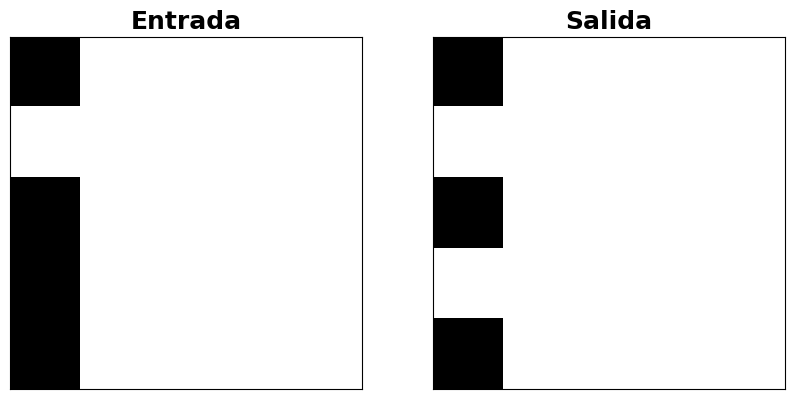

In [20]:
#se añade un patron con ruido
posicion=0
Resultado_modelo=np.zeros(Neuronas)

Entrada_ruido=np.array([patrones[posicion]])
indices = np.random.choice(Entrada_ruido.shape[1], size=0, replace=False)

for indice in indices:
    Entrada_ruido[0, indice] = 1- Entrada_ruido[0, indice]

A=np.dot(Entrada_ruido,np.array([W]))
B=np.reshape(A,-1)
for i in range(Neuronas):
  Resultado_modelo[i]=funcion_signo(B[i])


resultado=Resultado_modelo.reshape(5,5)
patron_entrada=Entrada_ruido.reshape(5,5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(patron_entrada,cmap='gray_r', vmin=0, vmax=1)
plt.title('Entrada', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(resultado,cmap='gray_r', vmin=0, vmax=1)
plt.title('Salida', fontweight='bold', fontsize=18)
plt.xticks([])
plt.yticks([])

In [ ]:
#se carga los patrones
#P1= X

P1_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [-1,  1, -1,  1, -1],
    [-1, -1,  1, -1, -1],
    [-1,  1, -1,  1, -1],
    [ 1, -1, -1, -1,  1],
])

#P2= C

P2_dato=np.array( [
    [  -1,  1,  1,  1,   1],
    [  1, -1, -1, -1,  -1],
    [  1 , -1, -1, -1,  -1],
    [ 1 , -1, -1, -1,  -1],
    [  -1,  1,  1,  1 ,  1],
])

#P3= T

P3_dato= np.array([
    [  1,  1,  1,  1,   1],
    [ -1, -1,  1, -1,  -1],
    [-1 , -1,  1, -1,  -1],
    [-1 , -1,  1, -1,  -1],
    [ -1, -1,  1, -1 , -1],
])

#P4= E
P4_dato=np.array( [
    [  1,  1,  1,  1,  -1],
    [ 1, -1, -1, -1,  -1],
    [ 1 ,  1, 1, -1,  -1],
    [ 1 , -1, -1, -1,  -1],
    [  1,  1,  1,  1 , -1],
])

#P5= F

P5_dato=np.array( [
    [ 1, 1, 1, 1,  -1],
    [ 1, -1, -1, -1,  -1],
    [1 , 1, 1, -1,  -1],
    [1 , -1, -1, -1,  -1],
    [ 1, -1, -1, -1 , -1],
])

#P6= G

P6_dato=np.array( [
    [ -1, 1, 1, 1,  -1],
    [ 1, -1, -1, -1,  -1],
    [1 , -1, 1, 1,  1],
    [1 , -1, -1, -1,  1],
    [ -1, 1, 1, 1 , -1],
])

#P7= H
P7_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [1 , 1, 1, 1,  1],
    [1 , -1, -1, -1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P8= i

P8_dato=np.array( [
    [ -1, -1, 1, -1,  -1],
    [ -1, -1, -1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [ -1, -1, 1, -1 , -1],
])

#P9= K
P9_dato= np.array([
    [ -1, 1, -1, -1,  1],
    [ -1, 1, -1, 1,  -1],
    [-1 , 1, 1, -1,  -1],
    [-1 , 1, -1, 1,  -1],
    [ -1, 1, -1, -1 , 1],
])
#P10= Y
P10_dato= np.array([
    [ 1, -1, -1, -1,  1],
    [ -1, 1, -1, 1,  -1],
    [-1 , -1, 1, -1,  -1],
    [-1 , -1, 1, -1,  -1],
    [ -1, -1, 1, -1 , -1],
])



#P11= W

P11_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [1 , -1, 1, -1,  1],
    [1 , 1, -1, 1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P12= M

P12_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, 1, -1, 1,  1],
    [1 , -1, 1, -1,  1],
    [1 , -1, -1, -1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P13= N

P13_dato=np.array([
    [ 1, -1, -1, -1,  1],
    [ 1, 1, -1, -1,  1],
    [1 , -1, 1, -1,  1],
    [1 , -1, -1, 1,  1],
    [ 1, -1, -1, -1 , 1],
])

#P14= V

P14_dato=np.array( [
    [ 1, -1, -1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [-1 , 1, -1, 1,  -1],
    [-1 , 1, -1, 1,  -1],
    [ -1, -1, 1, -1 , -1],
])

array([[-1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0]])

In [ ]:
B

array([-2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

# **Ejercicio PCA**

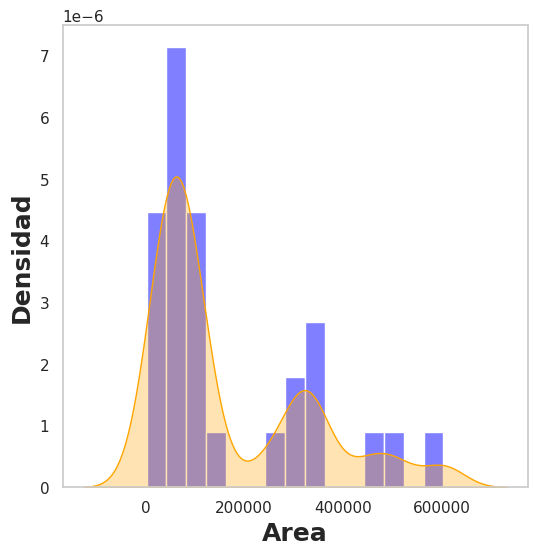

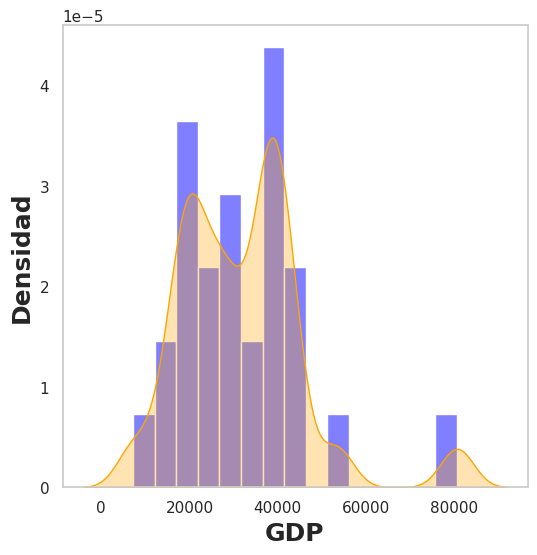

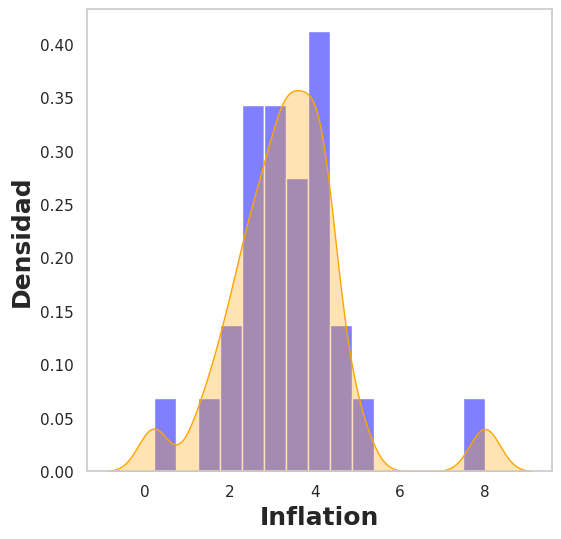

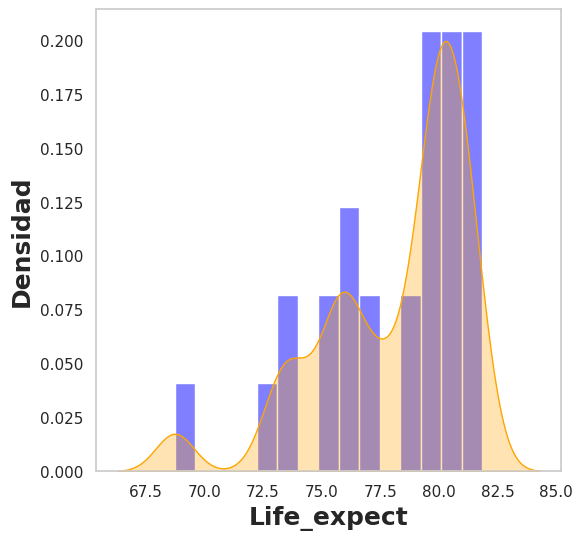

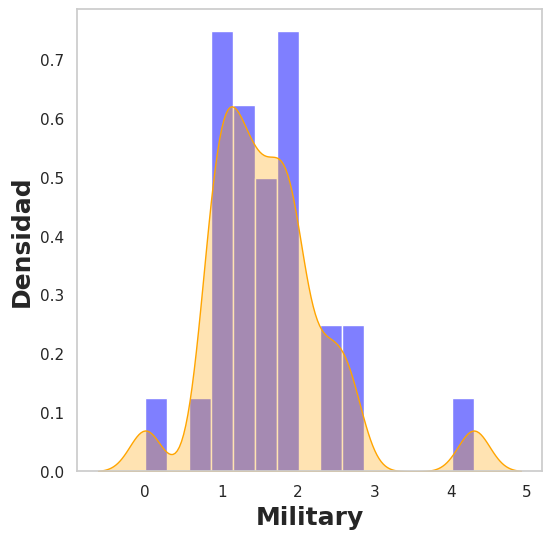

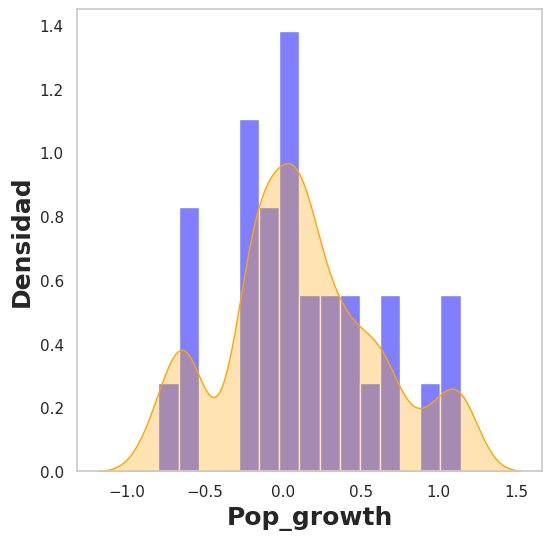

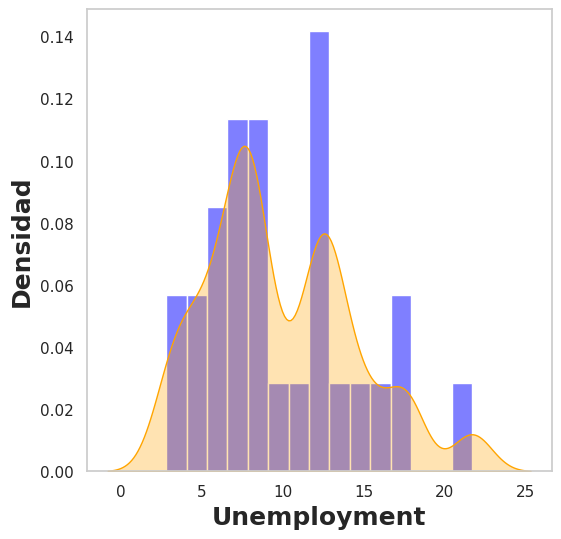

In [ ]:
#se cargan los datos y se crea el dataframe
data = {
    "Country": [
        "Austria", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
        "Estonia", "Finland", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
        "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", "Norway",
        "Poland", "Portugal", "Slovakia", "Slovenia", "Spain", "Sweden",
        "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Area": [
        83871, 30528, 110879, 56594, 78867, 43094,
        45228, 338145, 357022, 131957, 93028, 103000, 70273,
        301340, 64589, 65300, 2586, 41543, 323802,
        312685, 92090, 49035, 20273, 505370, 450295,
        41277, 603550, 243610
    ],
    "GDP": [
        41600, 37800, 13800, 18000, 27100, 37000,
        20400, 36000, 38100, 26300, 19600, 38100, 40800,
        30500, 16800, 19100, 80600, 42000, 53400,
        20200, 23400, 23300, 28800, 30500, 40700,
        44500, 7200, 36500
    ],
    "Inflation": [
        3.5, 3.5, 4.2, 2.3, 1.9, 2.8,
        5, 3.3, 2.5, 3.3, 3.9, 4, 2.6,
        2.9, 4.4, 4.1, 3.4, 2.3, 1.3,
        4.2, 3.7, 3.9, 1.8, 3.1, 3,
        0.2, 8, 4.5
    ],
    "Life_expect": [
        79.91, 79.65, 73.84, 75.99, 77.38, 78.78,
        73.58, 79.41, 80.19, 80.05, 75.02, 81, 80.32,
        81.86, 72.93, 75.55, 79.75, 80.91, 80.32,
        76.25, 78.7, 76.03, 77.48, 81.27, 81.18,
        81.17, 68.74, 80.17
    ],
    "Military": [
        0.8, 1.3, 2.6, 2.39, 1.15, 1.3,
        2, 2, 1.5, 4.3, 1.75, 0, 0.9,
        1.8, 1.1, 0.9, 0.9, 1.6, 1.9,
        1.9, 2.3, 1.08, 1.7, 1.2, 1.5,
        1, 1.4, 2.7
    ],
    "Pop_growth": [
        0.03, 0.06, -0.8, -0.09, -0.13, 0.24,
        -0.65, 0.07, -0.2, 0.06, -0.18, 0.67, 1.11,
        0.38, -0.6, -0.28, 1.14, 0.45, 0.33,
        -0.08, 0.18, 0.1, -0.19, 0.65, 0.17,
        0.92, -0.63, 0.55
    ],
    "Unemployment": [
        4.2, 7.2, 9.6, 17.7, 8.5, 6.1,
        12.5, 7.8, 6, 17.4, 10.9, 7.4, 14.4,
        8.4, 12.8, 15.4, 5.7, 4.4, 3.3,
        12.4, 12.7, 13.2, 11.8, 21.7, 7.5,
        2.8, 7.9, 8.1
    ]
}

df = pd.DataFrame(data)
#se extrae las variables
variables = df.columns[1:].to_numpy()

sns.set(style="whitegrid")
for variable in variables:
    plt.figure(figsize=(6, 6))


    sns.histplot(df[variable], bins=15, kde=False, stat="density", color='blue', alpha=0.5, label='Histograma')

    sns.kdeplot(df[variable], bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')


    plt.xlabel(variable,fontweight='bold', fontsize=18)
    plt.ylabel('Densidad', fontweight='bold', fontsize=18)
    plt.grid()
    plt.show()


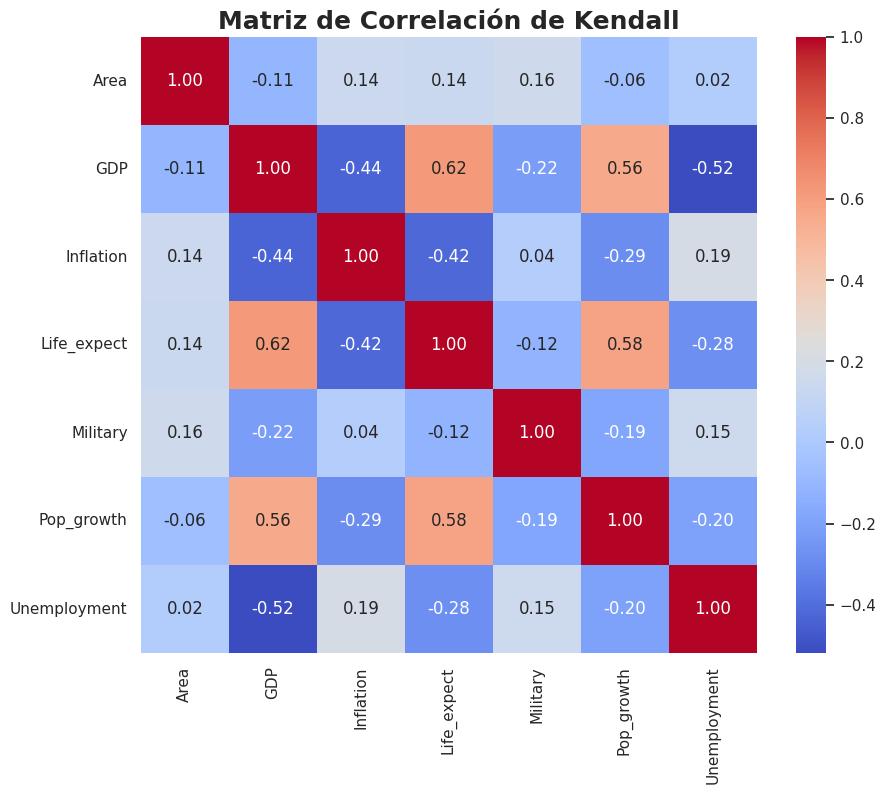

In [ ]:
#se realiza las matrices de correlación

correlation_matrix = df.drop(columns=["Country"]).corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación de Kendall', fontweight='bold', fontsize=18)
plt.show()

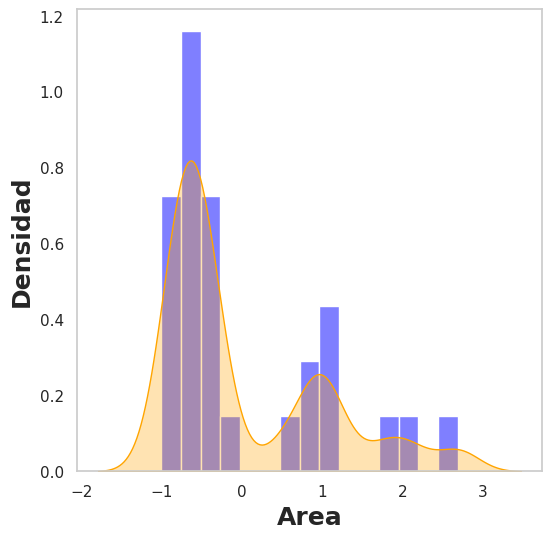

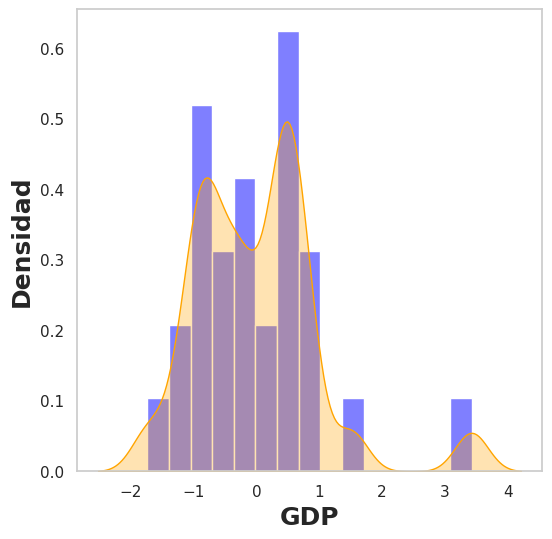

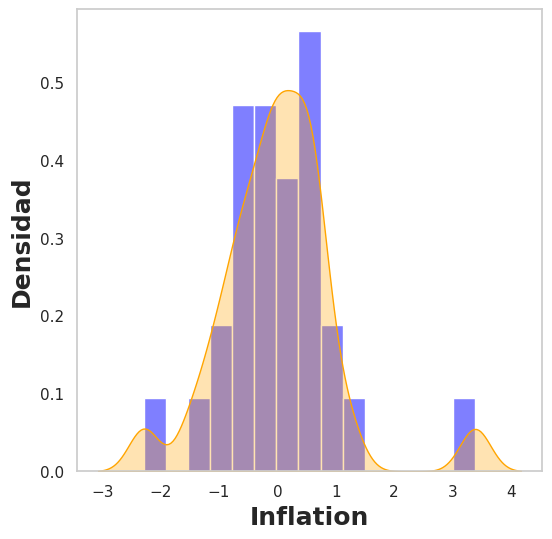

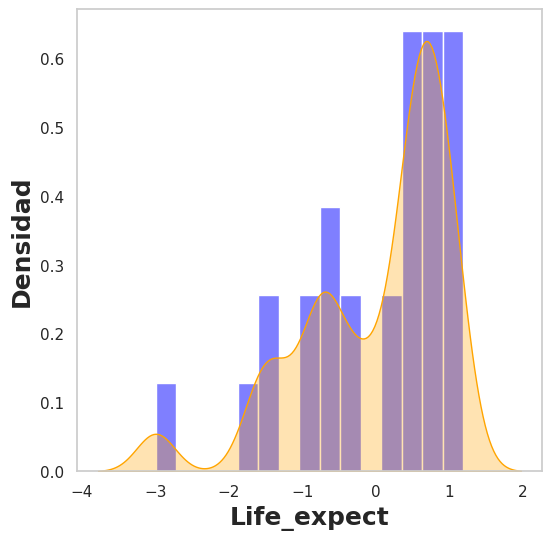

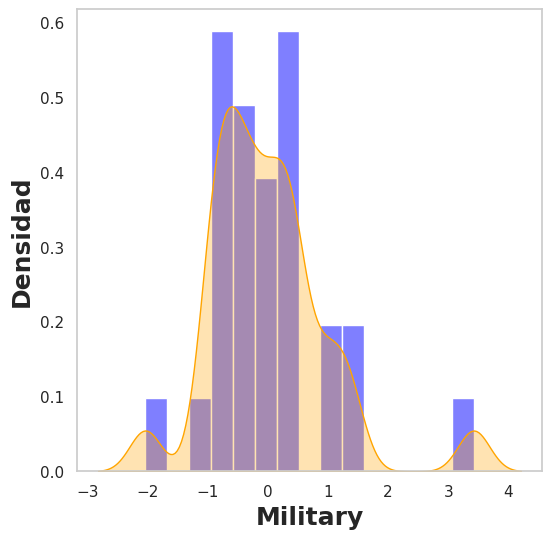

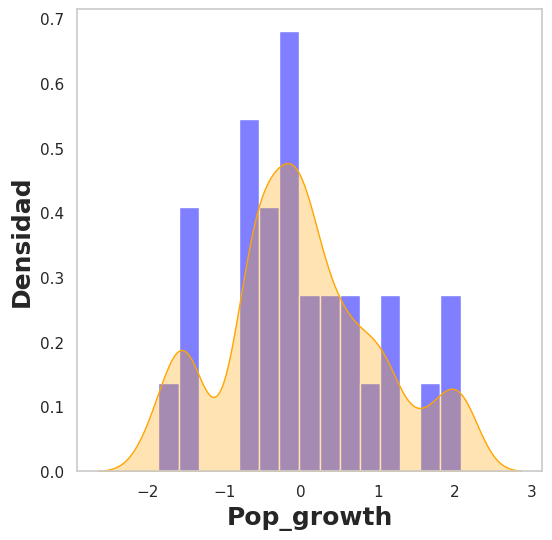

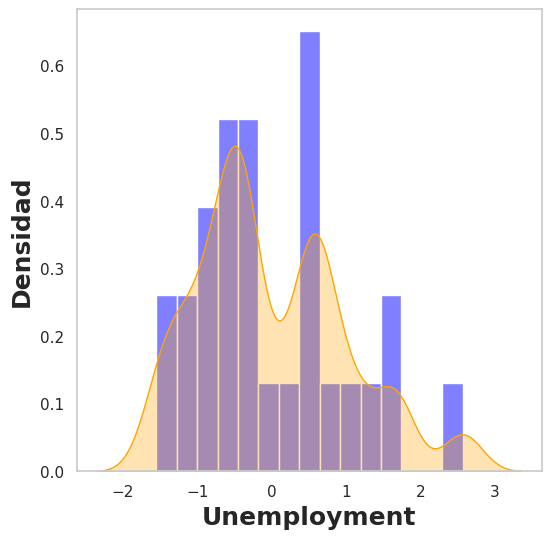

In [ ]:
#se estandariza estandar

X = df.drop(columns=["Country"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se crea un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

for variable in scaled_df.columns:
    plt.figure(figsize=(6, 6))


    sns.histplot(scaled_df[variable], bins=15, kde=False, stat="density", color='blue', alpha=0.5, label='Histograma')


    sns.kdeplot(scaled_df[variable], bw_adjust=0.5, fill=True, alpha=0.3, color='orange', label='KDE')


    plt.xlabel(variable,fontweight='bold', fontsize=18)
    plt.ylabel('Densidad', fontweight='bold', fontsize=18)
    plt.grid()
    plt.show()

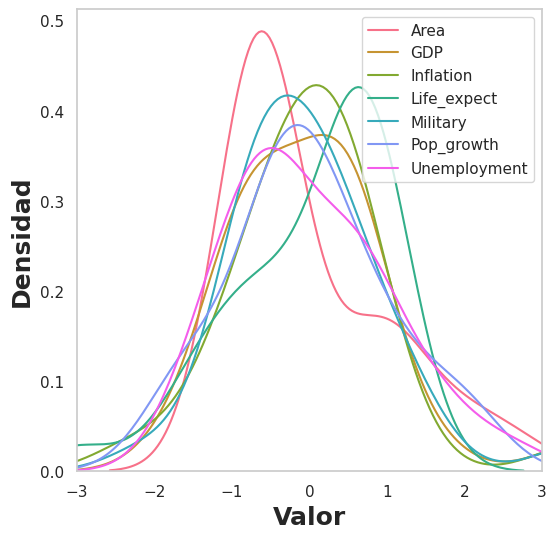

In [ ]:
#se grafica la distirbución de todos los atributos
colores = sns.color_palette("husl", len(variables))
plt.figure(figsize=(6, 6))

for i, variable in enumerate(variables):

    sns.kdeplot(scaled_df[variable], color=colores[i], label=variable)

plt.xlabel('Valor', fontweight='bold', fontsize=18)
plt.ylabel('Densidad', fontweight='bold', fontsize=18)
plt.xlim(-3,3)
plt.legend()
plt.grid()
plt.show()

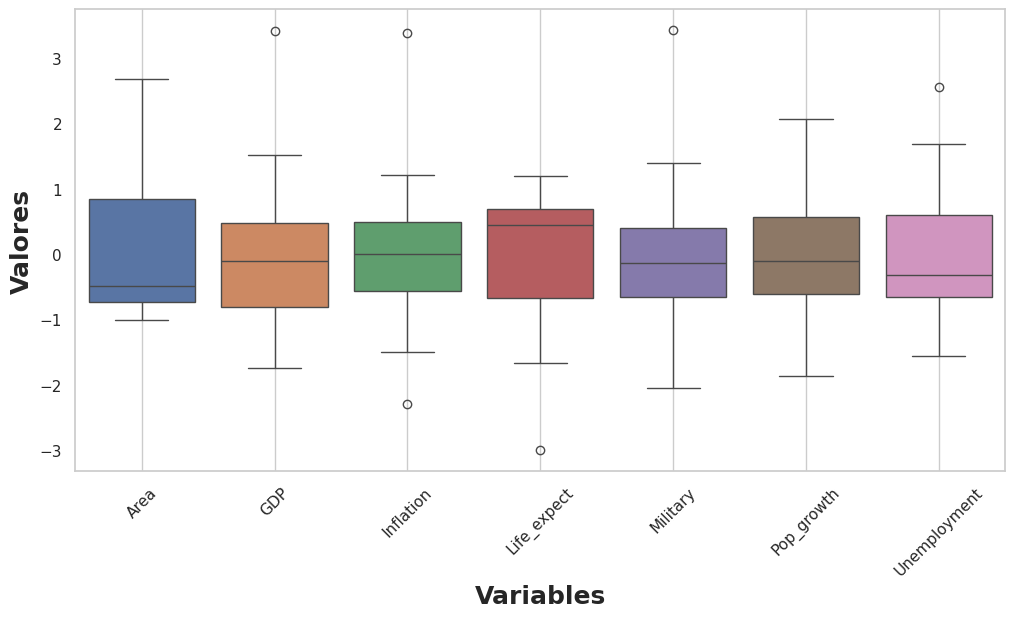

In [ ]:
#se hace el grafico de caja de los datos escalados
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df,native_scale=True)
plt.xlabel('Variables', fontweight='bold', fontsize=18)
plt.ylabel('Valores', fontweight='bold', fontsize=18)
plt.xticks(rotation=45)
plt.grid()
plt.show()

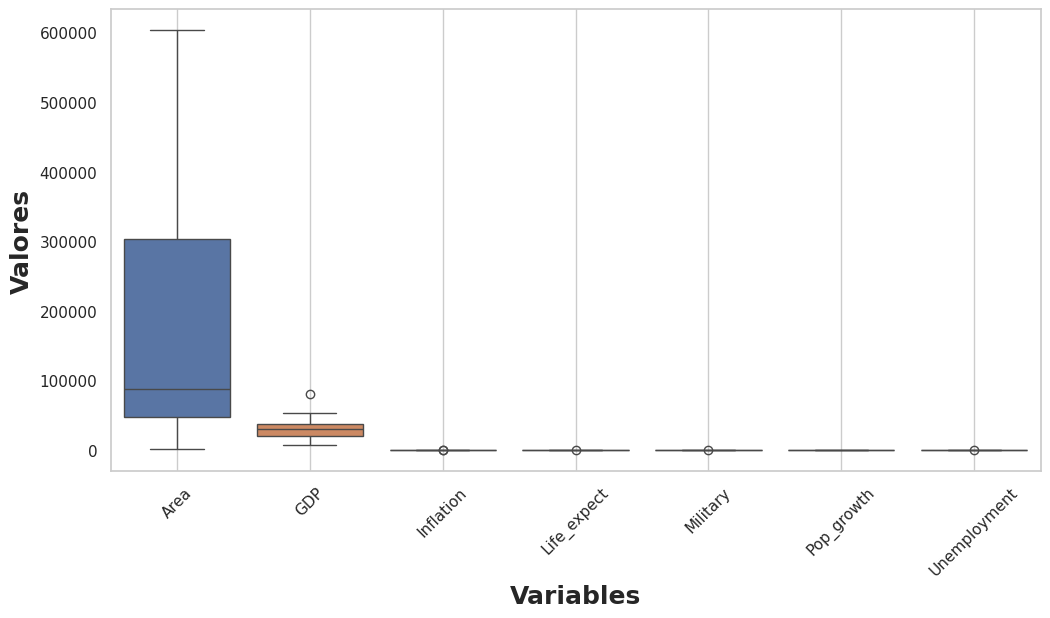

In [ ]:
#se hace el grafico de caja de los datos originales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Country"]))
plt.xlabel('Variables', fontweight='bold', fontsize=18)
plt.ylabel('Valores', fontweight='bold', fontsize=18)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Tiempo de ejecución: 0.00487208366394043 segundos


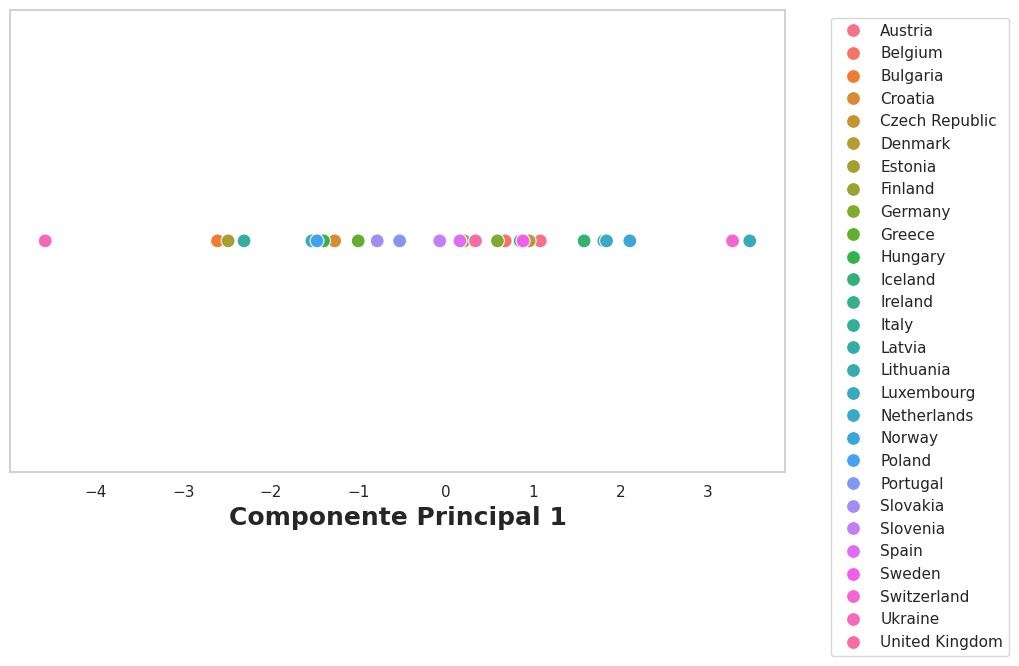

In [ ]:
#se realiza el PCA

inicio = time.time()

pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)
cargas = pca.components_[0]

final = time.time()
tiempo = final- inicio
print(f"Tiempo de ejecución: {tiempo} segundos")



# se crea el  DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1'])
pca_df['Country'] = df['Country']

# Se grafica el resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country', s=100)
plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

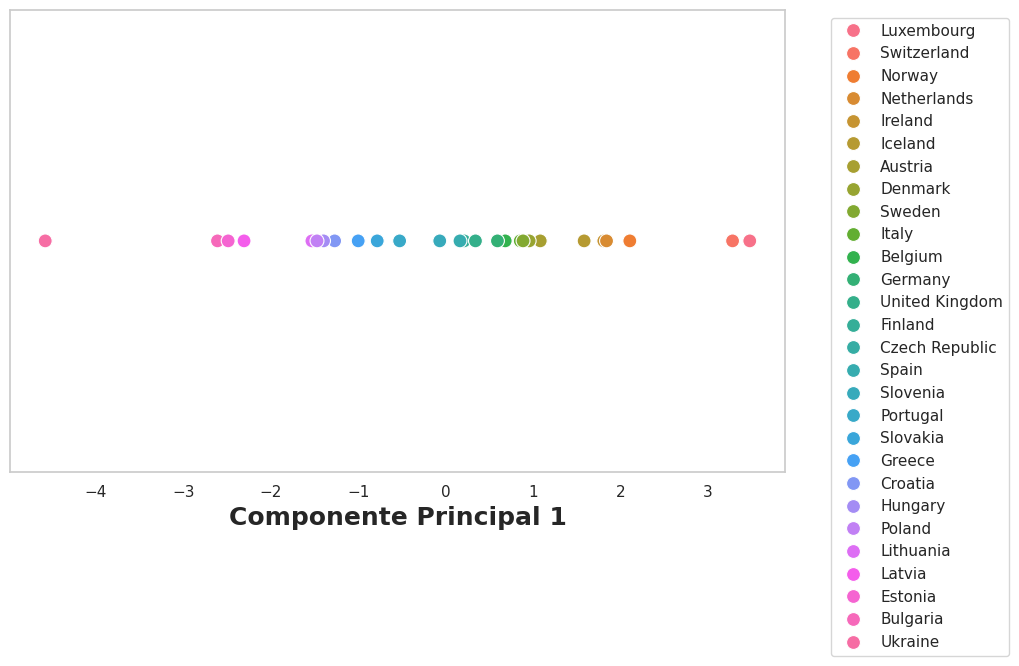

In [ ]:
# Se Calcular el promedio del PCA para ordenarlo de menor a mayor
country_order = pca_df.groupby('Country')['PCA1'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country',
                hue_order=country_order, s=100)

plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

<ipython-input-11-33920ae7e9de>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')


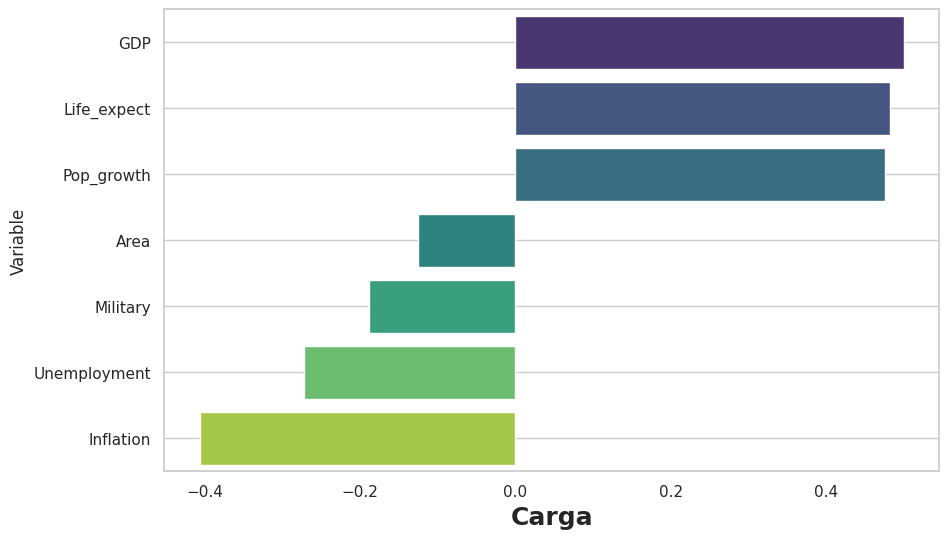

In [ ]:
cargas = pca.components_[0]

# Se Crea un DataFrame para las cargas
cargas_df = pd.DataFrame({'Variable': X.columns, 'Carga': cargas})

cargas_df['Carga'] = cargas_df['Carga']
cargas_df = cargas_df.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.grid()
plt.show()

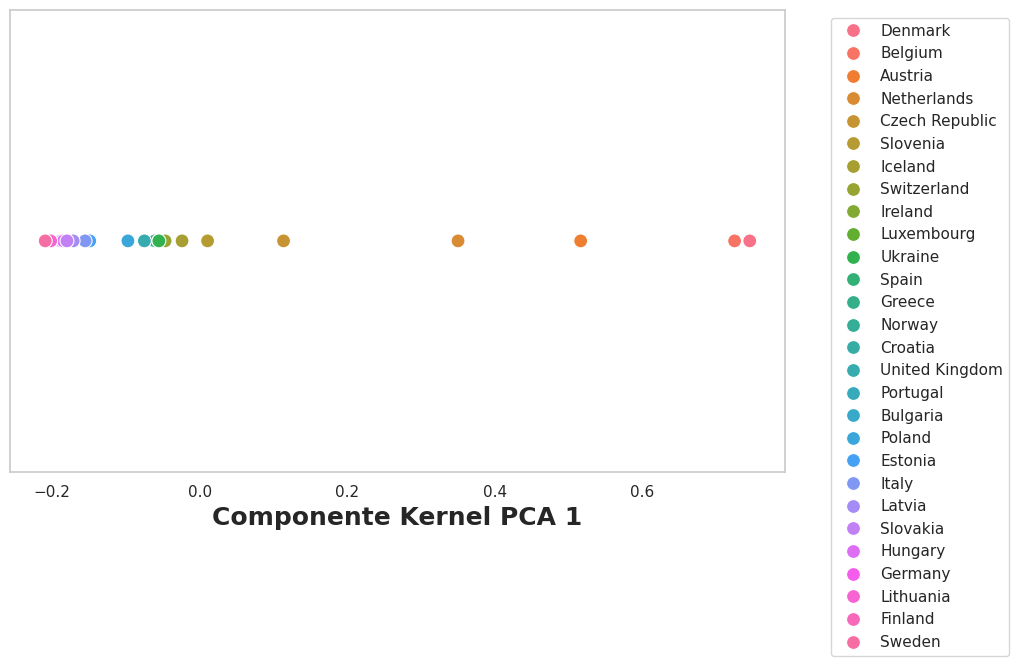

In [ ]:
#se realiza el PCA no lineal
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

# Se aplicar Kernel PCA con kernel RBF (exponencial)
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=1)
kpca_result = kpca.fit_transform(X_scaled)


kpca_df = pd.DataFrame(data=kpca_result, columns=['Kernel PCA 1'])
kpca_df['Country'] = df['Country']

country_order_kpca = kpca_df.groupby('Country')['Kernel PCA 1'].mean().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kernel PCA 1', y=np.zeros_like(kpca_df['Kernel PCA 1']), data=kpca_df, hue='Country',
                hue_order=country_order_kpca, s=100)

plt.xlabel('Componente Kernel PCA 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


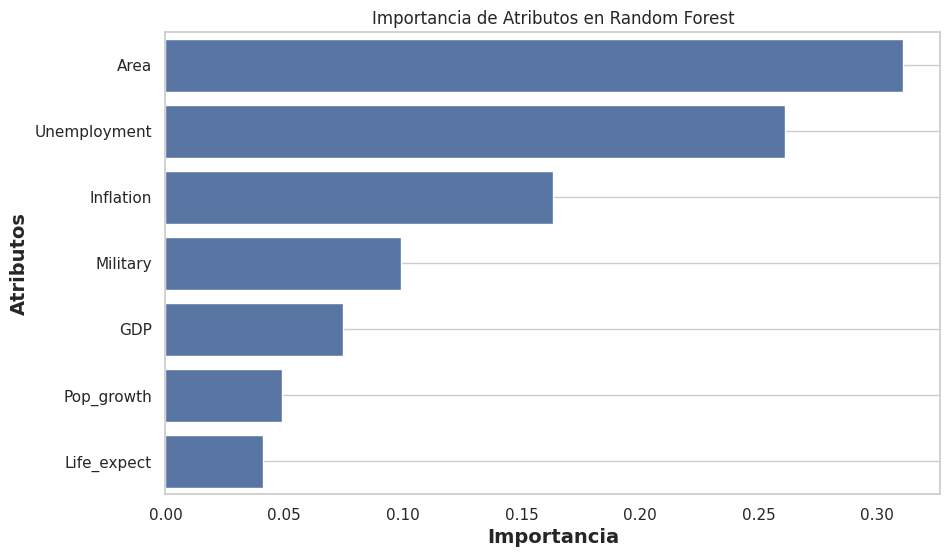

In [ ]:
#se ajusta el PCA no lineal con un modelo de random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_scaled,kpca_result)


importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de Atributos en Random Forest')
plt.xlabel('Importancia', fontweight='bold', fontsize=14)
plt.ylabel('Atributos', fontweight='bold', fontsize=14)
plt.grid()
plt.show()

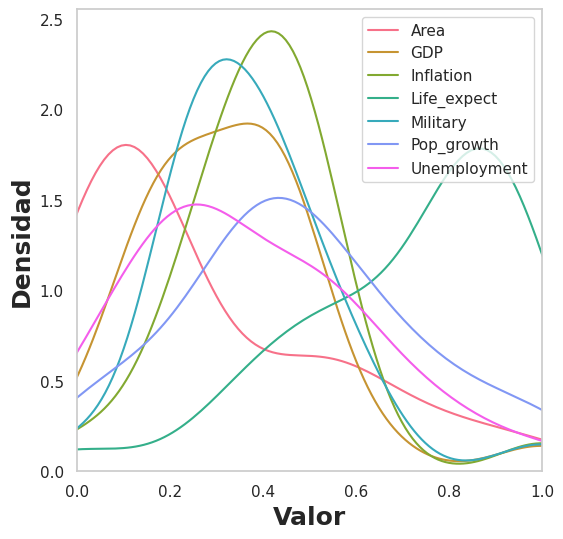

In [ ]:
#se estandariza con min max

X = df.drop(columns=["Country"])


scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

# Se crea un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


colores = sns.color_palette("husl", len(variables))
plt.figure(figsize=(6, 6))

for i, variable in enumerate(variables):

    sns.kdeplot(scaled_df[variable], color=colores[i], label=variable)

plt.xlabel('Valor', fontweight='bold', fontsize=18)
plt.ylabel('Densidad', fontweight='bold', fontsize=18)
plt.xlim(0,1)
plt.legend()
plt.grid()
plt.show()

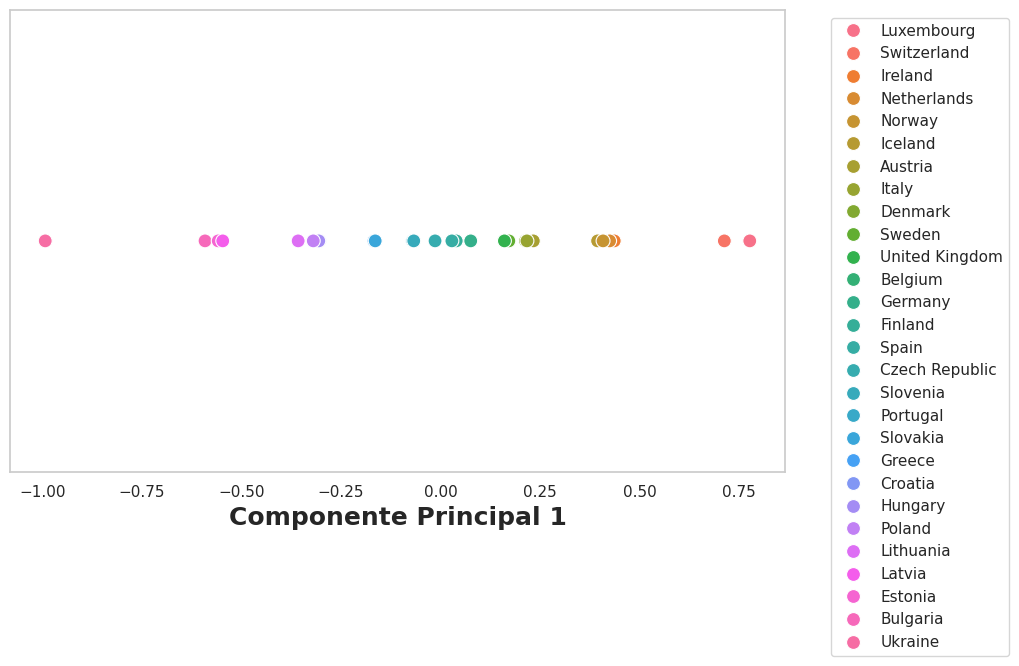

In [ ]:
#se realiza el PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)

# se crea el  DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1'])
pca_df['Country'] = df['Country']

# Se calcula el promedio del PCA para ordenarlo de menor a mayor
country_order = pca_df.groupby('Country')['PCA1'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y=np.zeros_like(pca_df['PCA1']), data=pca_df, hue='Country',
                hue_order=country_order, s=100)

plt.xlabel('Componente Principal 1', fontweight='bold', fontsize=18)
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

<ipython-input-14-33920ae7e9de>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')


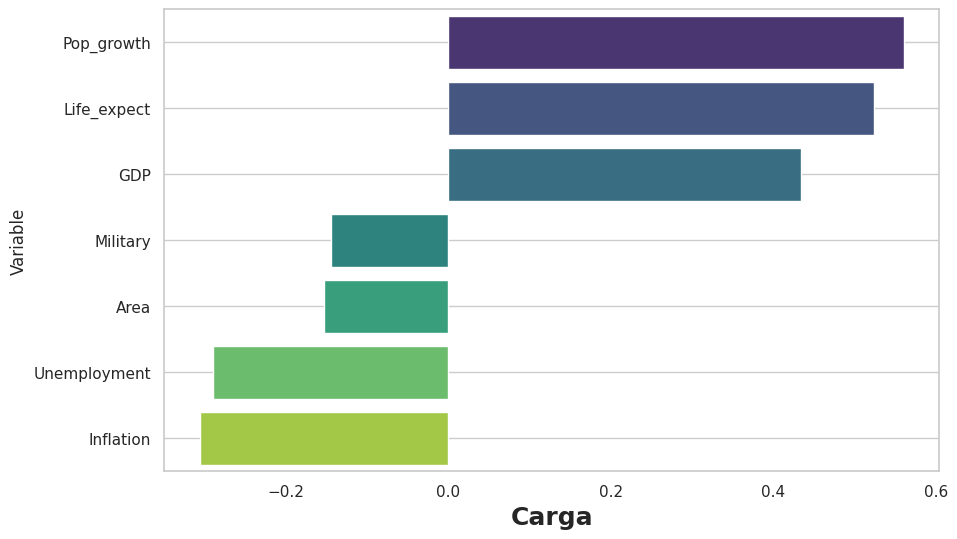

In [ ]:
cargas = pca.components_[0]

# Se Crea un DataFrame para las cargas
cargas_df = pd.DataFrame({'Variable': X.columns, 'Carga': cargas})

cargas_df['Carga'] = cargas_df['Carga']
cargas_df = cargas_df.sort_values(by='Carga', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=cargas_df, palette='viridis')
plt.xlabel('Carga', fontweight='bold', fontsize=18)
plt.grid()
plt.show()